<a href="https://colab.research.google.com/github/dauparas/proteins/blob/master/AlphaFoldNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AlphaFold model on Google Colabs

Original code: https://github.com/deepmind/deepmind-research/tree/master/alphafold_casp13

Some slides about inputs and architecture: https://docs.google.com/presentation/d/1Zq6fHW3yIq5XSp8Yep4OAR5sY6S0979RaTMWjENbnDs/edit?usp=sharing

In [ ]:
!wget http://bit.ly/alphafold-casp13-data

--2020-05-22 18:42:17--  http://bit.ly/alphafold-casp13-data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://storage.googleapis.com/alphafold_casp13_data/casp13_data.zip [following]
--2020-05-22 18:42:17--  https://storage.googleapis.com/alphafold_casp13_data/casp13_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.128, 2607:f8b0:4001:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46578878231 (43G) [application/zip]
Saving to: ‘alphafold-casp13-data’

alphafold-casp13-da   1%[                    ] 824.01M  84.9MB/s    eta 9m 54s ^C


## Setup environment

In [ ]:
#@title Clone deepmind-research { display-mode: "form" }

!git clone https://github.com/deepmind/deepmind-research.git

Cloning into 'deepmind-research'...
remote: Enumerating objects: 55, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 571 (delta 22), reused 42 (delta 15), pack-reused 516
Receiving objects: 100% (571/571), 31.70 MiB | 28.37 MiB/s, done.
Resolving deltas: 100% (273/273), done.


In [ ]:
#@title Install dependencies { display-mode: "form" }

!pip install -r ./deepmind-research/alphafold_casp13/requirements.txt
!pip install tensorflow-gpu==1.14

     |████████████████████████████████| 583kB 4.8MB/s 
     |████████████████████████████████| 112kB 23.8MB/s 
     |████████████████████████████████| 17.3MB 201kB/s 
     |████████████████████████████████| 655kB 61.5MB/s 
     |████████████████████████████████| 109.2MB 38kB/s 
     |████████████████████████████████| 983kB 48.9MB/s 
     |████████████████████████████████| 3.2MB 58.4MB/s 
     |████████████████████████████████| 491kB 48.3MB/s 
  Created wheel for absl-py: filename=absl_py-0.8.1-cp36-none-any.whl size=121167 sha256=f2c492f25048a2937aec532d9ba2ed4b6908668242f9ee06ca2f75fc74c6a6b5
  Stored in directory: /root/.cache/pip/wheels/a7/15/a0/0a0561549ad11cdc1bc8fa1191a353efd30facf6bfb507aefc
Successfully built absl-py
ERROR: xarray 0.15.1 has requirement setuptools>=41.2, but you'll have setuptools 41.0.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement

     |████████████████████████████████| 377.0MB 43kB/s 


In [ ]:
#@title Restart runtime { display-mode: "form" }
#restart runtime to have new dependencies working
import os
os.kill(os.getpid(), 9)

In [ ]:
#@title Get model weights { display-mode: "form" }
!wget http://bit.ly/alphafold-casp13-weights
!unzip alphafold-casp13-weights -d ./deepmind-research/alphafold_casp13/

--2020-04-01 00:46:33--  http://bit.ly/alphafold-casp13-weights
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://storage.googleapis.com/alphafold_casp13_data/alphafold_casp13_weights.zip [following]
--2020-04-01 00:46:33--  https://storage.googleapis.com/alphafold_casp13_data/alphafold_casp13_weights.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.28.128, 2607:f8b0:400e:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.28.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 218839215 (209M) [application/zip]
Saving to: ‘alphafold-casp13-weights’

alphafold-casp13-we 100%[===================>] 208.70M  52.9MB/s    in 3.9s    

2020-04-01 00:46:37 (52.9 MB/s) - ‘alphafold-casp13-weights’ saved [218839215/218839215]

Archive:  alphafold-casp13-weights
   creating: .

In [ ]:
#@title Get CASP13 target T0958 { display-mode: "form" }
import gdown
url = 'https://drive.google.com/uc?id=1D7_fcg3VaW35RAbVJER0eXlPB8rLw2Gj'
output = 'T0958.zip'
gdown.download(url, output, quiet=False)
!unzip 'T0958.zip' -d ./deepmind-research/alphafold_casp13/

Downloading...
From: https://drive.google.com/uc?id=1D7_fcg3VaW35RAbVJER0eXlPB8rLw2Gj
To: /content/T0958.zip
6.20MB [00:00, 58.9MB/s]


Archive:  T0958.zip
   creating: ./deepmind-research/alphafold_casp13/T0958/
   creating: ./deepmind-research/alphafold_casp13/T0958/contacts/
  inflating: ./deepmind-research/alphafold_casp13/T0958/contacts/T0958.pickle  
  inflating: ./deepmind-research/alphafold_casp13/T0958/contacts/T0958.rr  
  inflating: ./deepmind-research/alphafold_casp13/T0958/T0958.tfrec  


In [ ]:
#@title Get CASP13 target T0976 { display-mode: "form" }
import gdown
url = 'https://drive.google.com/uc?id=1bpoiEgQEzTqucyQnUY8jjuBr677pKczF'
output = 'T0976.zip'
gdown.download(url, output, quiet=False)
!unzip 'T0976.zip' -d ./deepmind-research/alphafold_casp13/

Downloading...
From: https://drive.google.com/uc?id=1bpoiEgQEzTqucyQnUY8jjuBr677pKczF
To: /content/T0976.zip
303MB [00:03, 76.8MB/s]


Archive:  T0976.zip
   creating: ./deepmind-research/alphafold_casp13/T0976/
   creating: ./deepmind-research/alphafold_casp13/T0976/contacts/
  inflating: ./deepmind-research/alphafold_casp13/T0976/contacts/T0976.pickle  
  inflating: ./deepmind-research/alphafold_casp13/T0976/contacts/T0976.rr  
  inflating: ./deepmind-research/alphafold_casp13/T0976/T0976.tfrec  


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from absl import logging
import sonnet
import os
import numpy as np
import collections
import enum
import json
import six.moves.cPickle as pickle
import time
from absl import app
from absl import flags
from absl import logging
import six
import sonnet as snt
print(tf.__version__)
print(tf.test.is_gpu_available())


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

1.14.0
True


## Investigate input features and targets

In [ ]:
DISTOGRAM_MODEL="./deepmind-research/alphafold_casp13/873731"  # Path to the directory with the distogram model.
BACKGROUND_MODEL="./deepmind-research/alphafold_casp13/916425"  # Path to the directory with the background model.
TORSION_MODEL="./deepmind-research/alphafold_casp13/941521"  # Path to the directory with the torsion model.

TARGET="T0976"  # The name of the target.
TARGET_PATH=f"./deepmind-research/alphafold_casp13/{TARGET}"  # Path to the directory with the target input data.

OUTPUT_DIR=f"./contacts_{TARGET}"

config_path = f"{DISTOGRAM_MODEL}/{1}/config.json"

replica = 1

class my_flags:
  config_path = f"{DISTOGRAM_MODEL}/{replica}/config.json"
  checkpoint_path = f"{DISTOGRAM_MODEL}/{replica}/tf_graph_data/tf_graph_data.ckpt" 
  cpu = True
  output_path = f"{OUTPUT_DIR}/distogram/{replica}"
  eval_sstable = f"{TARGET_PATH}/{TARGET}.tfrec"
  stats_file = f"{DISTOGRAM_MODEL}/stats_train_s35.json"
  

FLAGS=my_flags()

In [ ]:
_features = {"features": [
      "profile",
      "hhblits_profile",
      "aatype",
      "pseudo_frob",
      "pseudolikelihood",
      "deletion_probability",
      "gap_matrix",
      "pseudo_bias",
      "profile_with_prior",
      "profile_with_prior_without_gaps",
      "reweighted_profile",
      "non_gapped_profile",
      "hmm_profile",
      "num_alignments",
      "seq_length"
    ]}

_scalars = {"scalars": [
      "num_effective_alignments",
      "resolution"
    ]}

_targets = {"targets": [
      "sec_structure",
      "sec_structure_mask",
      "solv_surf",
      "solv_surf_mask",
      "beta_positions",
      "beta_mask",
      "domain_name",
      "chain_name",
      "resolution",
      "num_alignments",
      "superfamily",
      "profile",
      "hhblits_profile",
      "residue_index",
      "between_segment_residues"
    ]}


def shape(feature_name, num_residues, features=None):
  NUM_RES = 'num residues placeholder'
  FEATURES = {
    'aatype': (tf.float32, [NUM_RES, 21]),
    'alpha_mask': (tf.int64, [NUM_RES, 1]),
    'alpha_positions': (tf.float32, [NUM_RES, 3]),
    'beta_mask': (tf.int64, [NUM_RES, 1]),
    'beta_positions': (tf.float32, [NUM_RES, 3]),
    'between_segment_residues': (tf.int64, [NUM_RES, 1]),
    'chain_name': (tf.string, [1]),
    'deletion_probability': (tf.float32, [NUM_RES, 1]),
    'domain_name': (tf.string, [1]),
    'gap_matrix': (tf.float32, [NUM_RES, NUM_RES, 1]),
    'hhblits_profile': (tf.float32, [NUM_RES, 22]),
    'hmm_profile': (tf.float32, [NUM_RES, 30]),
    'key': (tf.string, [1]),
    'mutual_information': (tf.float32, [NUM_RES, NUM_RES, 1]),
    'non_gapped_profile': (tf.float32, [NUM_RES, 21]),
    'num_alignments': (tf.int64, [NUM_RES, 1]),
    'num_effective_alignments': (tf.float32, [1]),
    'phi_angles': (tf.float32, [NUM_RES, 1]),
    'phi_mask': (tf.int64, [NUM_RES, 1]),
    'profile': (tf.float32, [NUM_RES, 21]),
    'profile_with_prior': (tf.float32, [NUM_RES, 22]),
    'profile_with_prior_without_gaps': (tf.float32, [NUM_RES, 21]),
    'pseudo_bias': (tf.float32, [NUM_RES, 22]),
    'pseudo_frob': (tf.float32, [NUM_RES, NUM_RES, 1]),
    'pseudolikelihood': (tf.float32, [NUM_RES, NUM_RES, 484]),
    'psi_angles': (tf.float32, [NUM_RES, 1]),
    'psi_mask': (tf.int64, [NUM_RES, 1]),
    'residue_index': (tf.int64, [NUM_RES, 1]),
    'resolution': (tf.float32, [1]),
    'reweighted_profile': (tf.float32, [NUM_RES, 22]),
    'sec_structure': (tf.int64, [NUM_RES, 8]),
    'sec_structure_mask': (tf.int64, [NUM_RES, 1]),
    'seq_length': (tf.int64, [NUM_RES, 1]),
    'sequence': (tf.string, [1]),
    'solv_surf': (tf.float32, [NUM_RES, 1]),
    'solv_surf_mask': (tf.int64, [NUM_RES, 1]),
    'superfamily': (tf.string, [1]),}
  """Get the shape for the given feature name.
  Args:
    feature_name: String identifier for the feature. If the feature name ends
      with "_unnormalized", theis suffix is stripped off.
    num_residues: The number of residues in the current domain - some elements
      of the shape can be dynamic and will be replaced by this value.
    features: A feature_name to (tf_dtype, shape) lookup; defaults to FEATURES.
  Returns:
    List of ints representation the tensor size.
  """
  features = features or FEATURES
  if feature_name.endswith('_unnormalized'):
    feature_name = feature_name[:-13]

  unused_dtype, raw_sizes = features[feature_name]
  replacements = {NUM_RES: num_residues}

  sizes = [replacements.get(dimension, dimension) for dimension in raw_sizes]
  return sizes

def parse_tfexample(raw_data, features):
  """Read a single TF Example proto and return a subset of its features.
  Args:
    raw_data: A serialized tf.Example proto.
    features: A dictionary of features, mapping string feature names to a tuple
      (dtype, shape). This dictionary should be a subset of
      protein_features.FEATURES (or the dictionary itself for all features).
  Returns:
    A dictionary of features mapping feature names to features. Only the given
    features are returned, all other ones are filtered out.
  """
  feature_map = {
      k: tf.io.FixedLenSequenceFeature(shape=(), dtype=v[0], allow_missing=True)
      for k, v in features.items()
  }
  parsed_features = tf.io.parse_single_example(raw_data, feature_map)

  # Find out what is the number of sequences and the number of alignments.
  num_residues = tf.cast(parsed_features['seq_length'][0], dtype=tf.int32)

  # Reshape the tensors according to the sequence length and num alignments.
  for k, v in parsed_features.items():
    new_shape = shape(feature_name=k, num_residues=num_residues)
    # Make sure the feature we are reshaping is not empty.
    assert_non_empty = tf.assert_greater(
        tf.size(v), 0, name='assert_%s_non_empty' % k,
        message='The feature %s is not set in the tf.Example. Either do not '
        'request the feature or use a tf.Example that has the feature set.' % k)
    with tf.control_dependencies([assert_non_empty]):
      parsed_features[k] = tf.reshape(v, new_shape, name='reshape_%s' % k)

  return parsed_features


def create_tf_dataset(tf_record_filename, features):
  """Creates an instance of tf.data.Dataset backed by a protein dataset SSTable.
  Args:
    tf_record_filename: A string with filename of the TFRecord file.
    features: A list of strings of feature names to be returned in the dataset.
  Returns:
    A tf.data.Dataset object. Its items are dictionaries from feature names to
    feature values.
  """
  NUM_RES = 'num residues placeholder'
  FEATURES = {
    'aatype': (tf.float32, [NUM_RES, 21]),
    'alpha_mask': (tf.int64, [NUM_RES, 1]),
    'alpha_positions': (tf.float32, [NUM_RES, 3]),
    'beta_mask': (tf.int64, [NUM_RES, 1]),
    'beta_positions': (tf.float32, [NUM_RES, 3]),
    'between_segment_residues': (tf.int64, [NUM_RES, 1]),
    'chain_name': (tf.string, [1]),
    'deletion_probability': (tf.float32, [NUM_RES, 1]),
    'domain_name': (tf.string, [1]),
    'gap_matrix': (tf.float32, [NUM_RES, NUM_RES, 1]),
    'hhblits_profile': (tf.float32, [NUM_RES, 22]),
    'hmm_profile': (tf.float32, [NUM_RES, 30]),
    'key': (tf.string, [1]),
    'mutual_information': (tf.float32, [NUM_RES, NUM_RES, 1]),
    'non_gapped_profile': (tf.float32, [NUM_RES, 21]),
    'num_alignments': (tf.int64, [NUM_RES, 1]),
    'num_effective_alignments': (tf.float32, [1]),
    'phi_angles': (tf.float32, [NUM_RES, 1]),
    'phi_mask': (tf.int64, [NUM_RES, 1]),
    'profile': (tf.float32, [NUM_RES, 21]),
    'profile_with_prior': (tf.float32, [NUM_RES, 22]),
    'profile_with_prior_without_gaps': (tf.float32, [NUM_RES, 21]),
    'pseudo_bias': (tf.float32, [NUM_RES, 22]),
    'pseudo_frob': (tf.float32, [NUM_RES, NUM_RES, 1]),
    'pseudolikelihood': (tf.float32, [NUM_RES, NUM_RES, 484]),
    'psi_angles': (tf.float32, [NUM_RES, 1]),
    'psi_mask': (tf.int64, [NUM_RES, 1]),
    'residue_index': (tf.int64, [NUM_RES, 1]),
    'resolution': (tf.float32, [1]),
    'reweighted_profile': (tf.float32, [NUM_RES, 22]),
    'sec_structure': (tf.int64, [NUM_RES, 8]),
    'sec_structure_mask': (tf.int64, [NUM_RES, 1]),
    'seq_length': (tf.int64, [NUM_RES, 1]),
    'sequence': (tf.string, [1]),
    'solv_surf': (tf.float32, [NUM_RES, 1]),
    'solv_surf_mask': (tf.int64, [NUM_RES, 1]),
    'superfamily': (tf.string, [1]),}
  # Make sure these features are always read.
  required_features = ['aatype', 'sequence', 'seq_length']
  features = list(set(features) | set(required_features))
  features = {name: FEATURES[name] for name in features}

  tf_dataset = tf.data.TFRecordDataset(filenames=[tf_record_filename])
  tf_dataset = tf_dataset.map(lambda raw: parse_tfexample(raw, features))

  return tf_dataset

In [ ]:
my_dataset = create_tf_dataset(tf_record_filename=FLAGS.eval_sstable,features=tuple(_features['features'])+tuple(_targets['targets'])+tuple(_scalars['scalars']))

In [ ]:
my_dataset

<DatasetV1Adapter shapes: {aatype: (?, 21), beta_mask: (?, 1), beta_positions: (?, 3), between_segment_residues: (?, 1), chain_name: (1,), deletion_probability: (?, 1), domain_name: (1,), gap_matrix: (?, ?, 1), hhblits_profile: (?, 22), hmm_profile: (?, 30), non_gapped_profile: (?, 21), num_alignments: (?, 1), num_effective_alignments: (1,), profile: (?, 21), profile_with_prior: (?, 22), profile_with_prior_without_gaps: (?, 21), pseudo_bias: (?, 22), pseudo_frob: (?, ?, 1), pseudolikelihood: (?, ?, 484), residue_index: (?, 1), resolution: (1,), reweighted_profile: (?, 22), sec_structure: (?, 8), sec_structure_mask: (?, 1), seq_length: (?, 1), sequence: (1,), solv_surf: (?, 1), solv_surf_mask: (?, 1), superfamily: (1,)}, types: {aatype: tf.float32, beta_mask: tf.int64, beta_positions: tf.float32, between_segment_residues: tf.int64, chain_name: tf.string, deletion_probability: tf.float32, domain_name: tf.string, gap_matrix: tf.float32, hhblits_profile: tf.float32, hmm_profile: tf.float32

In [ ]:
sum(1 for _ in tf.python_io.tf_record_iterator(FLAGS.eval_sstable))

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


13

In [ ]:
iter = my_dataset.make_initializable_iterator()
element = iter.get_next()
with tf.Session() as sess:
    sess.run(iter.initializer)
    out1 = sess.run(element)
    out2 = sess.run(element)
    out3 = sess.run(element)
    out4 = sess.run(element)
    out5 = sess.run(element)
    out6 = sess.run(element)
    out7 = sess.run(element)
    out8 = sess.run(element)
    out9 = sess.run(element)
    out10 = sess.run(element)
    out11 = sess.run(element)
    out12= sess.run(element)
    out13 = sess.run(element)

Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_initializable_iterator(dataset)`.


In [ ]:
out1.keys()

dict_keys(['aatype', 'beta_mask', 'beta_positions', 'between_segment_residues', 'chain_name', 'deletion_probability', 'domain_name', 'gap_matrix', 'hhblits_profile', 'hmm_profile', 'non_gapped_profile', 'num_alignments', 'num_effective_alignments', 'profile', 'profile_with_prior', 'profile_with_prior_without_gaps', 'pseudo_bias', 'pseudo_frob', 'pseudolikelihood', 'residue_index', 'resolution', 'reweighted_profile', 'sec_structure', 'sec_structure_mask', 'seq_length', 'sequence', 'solv_surf', 'solv_surf_mask', 'superfamily'])

In [ ]:
out1['aatype'].shape

(64, 21)

In [ ]:
out2['aatype'].shape

(64, 21)

In [ ]:
out3['aatype'].shape

(64, 21)

In [ ]:
out4['aatype'].shape

(128, 21)

In [ ]:
out5['aatype'].shape

(64, 21)

In [ ]:
out6['aatype'].shape

(128, 21)

In [ ]:
out7['aatype'].shape

(64, 21)

In [ ]:
out8['aatype'].shape

(64, 21)

In [ ]:
out9['aatype'].shape

(252, 21)

In [ ]:
out10['aatype'].shape

(64, 21)

In [ ]:
out11['aatype'].shape

(128, 21)

In [ ]:
out12['aatype'].shape

(128, 21)

In [ ]:
out13['aatype'].shape

(128, 21)

In [ ]:
def sequence_to_onehot(sequence):
  """Maps the given sequence into a one-hot encoded matrix."""
  mapping = {aa: i for i, aa in enumerate('ARNDCQEGHILKMFPSTWYVX')}
  num_entries = max(mapping.values()) + 1
  one_hot_arr = np.zeros((len(sequence), num_entries), dtype=np.int32)

  for aa_index, aa_type in enumerate(sequence):
    aa_id = mapping[aa_type]
    one_hot_arr[aa_index, aa_id] = 1

  return one_hot_arr

In [ ]:
np.max(sequence_to_onehot(out4['sequence'][0].decode("utf-8"))-out4['aatype'])

0.0

In [ ]:
out4['pseudo_bias'].shape

(128, 22)

In [ ]:
out4['sequence'][0].decode("utf-8")

'VSPNQFRPNEFLKLVNNAKTQIKECSTTELYNKINSQELDGIVFDVREDSEFNRFHIQGATHLSKGQIEVKIENLVPNKQQKIYLYCGSGFRSALAAESLQHMGYTNVVSIAGGIKDWLANNYPVSQN'

In [ ]:
print(out1['pseudolikelihood'].shape, out2['pseudolikelihood'].shape, out3['pseudolikelihood'].shape)

(64, 64, 484) (64, 64, 484) (64, 64, 484)


In [ ]:
print(out4['pseudolikelihood'].shape, out5['pseudolikelihood'].shape, out6['pseudolikelihood'].shape)

(128, 128, 484) (64, 64, 484) (128, 128, 484)


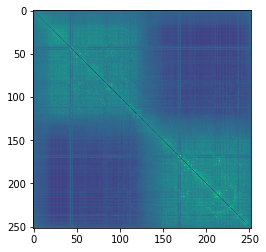

In [ ]:
plt.imshow(out9['pseudo_frob'][:,:,0])

In [ ]:
print(out7['pseudolikelihood'].shape, out8['pseudolikelihood'].shape, out9['pseudolikelihood'].shape)

(64, 64, 484) (64, 64, 484) (252, 252, 484)


In [ ]:
print(out10['pseudolikelihood'].shape, out11['pseudolikelihood'].shape, out12['pseudolikelihood'].shape)

(64, 64, 484) (128, 128, 484) (128, 128, 484)


In [ ]:
print(out13['pseudolikelihood'].shape)

(128, 128, 484)


In [ ]:
print(out9['sequence'])

[b'MKIMQHSSGFLKLVDDAKSRIQECSVDDIQKMNETQTLDGLLIDTREESEVANGYIPNAIHLSKGIIESAIESAVPNKNQKMYFYCGGGFRSALVADKLREMGYKNVISVDGGWRAWNAKGYPTVSPNQFRPNEFLKLVNNAKTQIKECSTTELYNKINSQELDGIVFDVREDSEFNRFHIQGATHLSKGQIEVKIENLVPNKQQKIYLYCGSGFRSALAAESLQHMGYTNVVSIAGGIKDWLANNYPVSQN']


In [ ]:
print(out2['sequence'])

[b'NETQTLDGLLIDTREESEVANGYIPNAIHLSKGIIESAIESAVPNKNQKMYFYCGGGFRSALVA']


In [ ]:
print(out3['sequence'])

[b'QELDGIVFDVREDSEFNRFHIQGATHLSKGQIEVKIENLVPNKQQKIYLYCGSGFRSALAAESL']


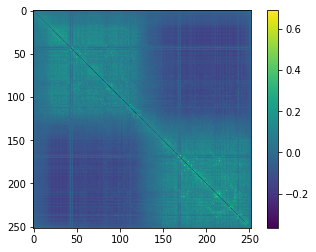

In [ ]:
plt.imshow(out9['pseudo_frob'][...,0])
plt.colorbar()

## Create model

In [ ]:
#@title two_dim_convnet.py { display-mode: "form" }
#https://github.com/deepmind/deepmind-research/blob/master/alphafold_casp13/two_dim_convnet.py
"""Two dimensional convolutional neural net layers."""

def weight_variable(shape, stddev=0.01):
  """Returns the weight variable."""
  logging.vlog(1, 'weight init for shape %s', str(shape))
  return tf.get_variable(
      'w', shape, initializer=tf.random_normal_initializer(stddev=stddev))


def bias_variable(shape):
  return tf.get_variable(
      'b', shape, initializer=tf.zeros_initializer())


def conv2d(x, w, atrou_rate=1, data_format='NHWC'):
  if atrou_rate > 1:
    return tf.nn.convolution(
        x,
        w,
        dilation_rate=[atrou_rate] * 2,
        padding='SAME',
        data_format=data_format)
  else:
    return tf.nn.conv2d(
        x, w, strides=[1, 1, 1, 1], padding='SAME', data_format=data_format)


def make_conv_sep2d_layer(input_node,
                          in_channels,
                          channel_multiplier,
                          out_channels,
                          layer_name,
                          filter_size,
                          filter_size_2=None,
                          batch_norm=False,
                          is_training=True,
                          atrou_rate=1,
                          data_format='NHWC',
                          stddev=0.01):
  """Use separable convolutions."""
  if filter_size_2 is None:
    filter_size_2 = filter_size
  logging.vlog(1, 'layer %s in %d out %d chan mult %d', layer_name, in_channels,
               out_channels, channel_multiplier)
  with tf.variable_scope(layer_name):
    with tf.variable_scope('depthwise'):
      w_depthwise = weight_variable(
          [filter_size, filter_size_2, in_channels, channel_multiplier],
          stddev=stddev)
    with tf.variable_scope('pointwise'):
      w_pointwise = weight_variable(
          [1, 1, in_channels * channel_multiplier, out_channels], stddev=stddev)
    h_conv = tf.nn.separable_conv2d(
        input_node,
        w_depthwise,
        w_pointwise,
        padding='SAME',
        strides=[1, 1, 1, 1],
        rate=[atrou_rate, atrou_rate],
        data_format=data_format)

    if batch_norm:
      h_conv = batch_norm_layer(
          h_conv, layer_name=layer_name, is_training=is_training,
          data_format=data_format)
    else:
      b_conv = bias_variable([out_channels])
      h_conv = tf.nn.bias_add(h_conv, b_conv, data_format=data_format)

    return h_conv


def batch_norm_layer(h_conv, layer_name, is_training=True, data_format='NCHW'):
  """Batch norm layer."""
  logging.vlog(1, 'batch norm for layer %s', layer_name)
  return tf.contrib.layers.batch_norm(
      h_conv,
      is_training=is_training,
      fused=True,
      decay=0.999,
      scope=layer_name,
      data_format=data_format)


def make_conv_layer(input_node,
                    in_channels,
                    out_channels,
                    layer_name,
                    filter_size,
                    filter_size_2=None,
                    non_linearity=True,
                    batch_norm=False,
                    is_training=True,
                    atrou_rate=1,
                    data_format='NHWC',
                    stddev=0.01):
  """Creates a convolution layer."""

  if filter_size_2 is None:
    filter_size_2 = filter_size
  logging.vlog(
      1, 'layer %s in %d out %d', layer_name, in_channels, out_channels)
  with tf.variable_scope(layer_name):
    w_conv = weight_variable(
        [filter_size, filter_size_2, in_channels, out_channels], stddev=stddev)
    h_conv = conv2d(
        input_node, w_conv, atrou_rate=atrou_rate, data_format=data_format)

    if batch_norm:
      h_conv = batch_norm_layer(
          h_conv, layer_name=layer_name, is_training=is_training,
          data_format=data_format)
    else:
      b_conv = bias_variable([out_channels])
      h_conv = tf.nn.bias_add(h_conv, b_conv, data_format=data_format)

    if non_linearity:
      h_conv = tf.nn.elu(h_conv)

    return h_conv

In [ ]:
#@title two_dim_resnet.py { display-mode: "form" }
#https://github.com/deepmind/deepmind-research/blob/master/alphafold_casp13/two_dim_resnet.py

#channel_multiplier == 0, i.e. make_conv_sep2d_layer is not used.
"""2D Resnet."""

def make_sep_res_layer(
    input_node,
    in_channels,
    out_channels,
    layer_name,
    filter_size,
    filter_size_2=None,
    batch_norm=False,
    is_training=True,
    divide_channels_by=2,
    atrou_rate=1,
    channel_multiplier=0,
    data_format='NHWC',
    stddev=0.01,
    dropout_keep_prob=1.0):
  """A separable resnet block."""

  with tf.name_scope(layer_name):
    input_times_almost_1 = input_node
    h_conv = input_times_almost_1

    if batch_norm:
      h_conv = batch_norm_layer(
          h_conv, layer_name=layer_name, is_training=is_training,
          data_format=data_format)

    h_conv = tf.nn.elu(h_conv)

    if filter_size_2 is None:
      filter_size_2 = filter_size

    # 1x1 with half size
    h_conv = make_conv_layer(
        h_conv,
        in_channels=in_channels,
        out_channels=in_channels / divide_channels_by,
        layer_name=layer_name + '_1x1h',
        filter_size=1,
        filter_size_2=1,
        non_linearity=True,
        batch_norm=batch_norm,
        is_training=is_training,
        data_format=data_format,
        stddev=stddev)

    # 3x3 with half size
    if channel_multiplier == 0:
      h_conv = make_conv_layer(
          h_conv,
          in_channels=in_channels / divide_channels_by,
          out_channels=in_channels / divide_channels_by,
          layer_name=layer_name + '_%dx%dh' % (filter_size, filter_size_2),
          filter_size=filter_size,
          filter_size_2=filter_size_2,
          non_linearity=True,
          batch_norm=batch_norm,
          is_training=is_training,
          atrou_rate=atrou_rate,
          data_format=data_format,
          stddev=stddev)
    else:
      # We use separable convolution for 3x3
      h_conv = make_conv_sep2d_layer(
          h_conv,
          in_channels=in_channels / divide_channels_by,
          channel_multiplier=channel_multiplier,
          out_channels=in_channels / divide_channels_by,
          layer_name=layer_name + '_sep%dx%dh' % (filter_size, filter_size_2),
          filter_size=filter_size,
          filter_size_2=filter_size_2,
          batch_norm=batch_norm,
          is_training=is_training,
          atrou_rate=atrou_rate,
          data_format=data_format,
          stddev=stddev)

    # 1x1 back to normal size without relu
    h_conv = make_conv_layer(
        h_conv,
        in_channels=in_channels / divide_channels_by,
        out_channels=out_channels,
        layer_name=layer_name + '_1x1',
        filter_size=1,
        filter_size_2=1,
        non_linearity=False,
        batch_norm=False,
        is_training=is_training,
        data_format=data_format,
        stddev=stddev)

    if dropout_keep_prob < 1.0:
      logging.info('dropout keep prob %f', dropout_keep_prob)
      h_conv = tf.nn.dropout(h_conv, keep_prob=dropout_keep_prob)

    return h_conv + input_times_almost_1


def make_two_dim_resnet(
    input_node,
    num_residues=50,
    num_features=40,
    num_predictions=1,
    num_channels=32,
    num_layers=2,
    filter_size=3,
    filter_size_2=None,
    final_non_linearity=False,
    name_prefix='',
    fancy=True,
    batch_norm=False,
    is_training=False,
    atrou_rates=None,
    channel_multiplier=0,
    divide_channels_by=2,
    resize_features_with_1x1=False,
    data_format='NHWC',
    stddev=0.01,
    dropout_keep_prob=1.0):
  """Two dim resnet towers."""
  del num_residues  # Unused.

  if atrou_rates is None:
    atrou_rates = [1]
  if not fancy:
    raise ValueError('non fancy deprecated')

  logging.info('atrou rates %s', atrou_rates)

  logging.info('name prefix %s', name_prefix)
  x_image = input_node
  previous_layer = x_image
  non_linearity = True
  for i_layer in range(num_layers):
    in_channels = num_channels
    out_channels = num_channels

    curr_atrou_rate = atrou_rates[i_layer % len(atrou_rates)]

    if i_layer == 0:
      in_channels = num_features
    if i_layer == num_layers - 1:
      out_channels = num_predictions
      non_linearity = final_non_linearity
    if i_layer == 0 or i_layer == num_layers - 1:
      layer_name = name_prefix + 'conv%d' % (i_layer + 1)
      initial_filter_size = filter_size
      if resize_features_with_1x1:
        initial_filter_size = 1
      previous_layer = make_conv_layer(
          input_node=previous_layer,
          in_channels=in_channels,
          out_channels=out_channels,
          layer_name=layer_name,
          filter_size=initial_filter_size,
          filter_size_2=filter_size_2,
          non_linearity=non_linearity,
          atrou_rate=curr_atrou_rate,
          data_format=data_format,
          stddev=stddev)
    else:
      layer_name = name_prefix + 'res%d' % (i_layer + 1)
      previous_layer = make_sep_res_layer(
          input_node=previous_layer,
          in_channels=in_channels,
          out_channels=out_channels,
          layer_name=layer_name,
          filter_size=filter_size,
          filter_size_2=filter_size_2,
          batch_norm=batch_norm,
          is_training=is_training,
          atrou_rate=curr_atrou_rate,
          channel_multiplier=channel_multiplier,
          divide_channels_by=divide_channels_by,
          data_format=data_format,
          stddev=stddev,
          dropout_keep_prob=dropout_keep_prob)

  y = previous_layer

  return y

In [ ]:
#@title secstruct.py { display-mode: "form" }
#https://github.com/deepmind/deepmind-research/blob/master/alphafold_casp13/secstruct.py

"""Layer for modelling and scoring secondary structure."""

# 8-class classes (Q8)
SECONDARY_STRUCTURES = '-HETSGBI'

# Equivalence classes for 3-class (Q3) from Li & Yu 2016.
# See http://www.cmbi.ru.nl/dssp.html for letter explanations.
Q3_MAP = ['-TSGIB', 'H', 'E']


def make_q3_matrices():
  """Generate mapping matrices for secstruct Q8:Q3 equivalence classes."""
  dimension = len(SECONDARY_STRUCTURES)
  q3_map_matrix = np.zeros((dimension, len(Q3_MAP)))
  q3_lookup = np.zeros((dimension,), dtype=np.int32)
  for i, eclass in enumerate(Q3_MAP):  # equivalence classes
    for m in eclass:  # Members of the class.
      ss_type = SECONDARY_STRUCTURES.index(m)
      q3_map_matrix[ss_type, i] = 1.0
      q3_lookup[ss_type] = i
  return q3_map_matrix, q3_lookup


class Secstruct(object):
  """Make a layer that computes hierarchical secstruct."""
  # Build static, shared structures:
  q3_map_matrix, q3_lookup = make_q3_matrices()
  static_dimension = len(SECONDARY_STRUCTURES)

  def __init__(self, name='secstruct'):
    self.name = name
    self._dimension = Secstruct.static_dimension

  def make_layer_new(self, activations):
    """Make the layer."""
    with tf.variable_scope(self.name, reuse=tf.AUTO_REUSE):
      logging.info('Creating secstruct %s', activations)
      self.logits = tf.contrib.layers.linear(activations, self._dimension)
      self.ss_q8_probs = tf.nn.softmax(self.logits)
      self.ss_q3_probs = tf.matmul(
          self.ss_q8_probs, tf.constant(self.q3_map_matrix, dtype=tf.float32))

  def get_q8_probs(self):
    return self.ss_q8_probs


def save_secstructs(dump_dir_path, name, index, sequence, probs,
                    label='Deepmind secstruct'):
  """Write secstruct prob distributions to an ss2 file.

  Can be overloaded to write out asa values too.

  Args:
    dump_dir_path: directory where to write files.
    name: name of domain
    index: index number of multiple samples. (or None for no index)
    sequence: string of L residue labels
    probs: L x D matrix of probabilities. L is length of sequence,
      D is probability dimension (usually 3).
    label: A label for the file.
  """
  filename = os.path.join(dump_dir_path, '%s.ss2' % name)
  if index is not None:
    filename = os.path.join(dump_dir_path, '%s_%04d.ss2' % (name, index))
  with tf.io.gfile.GFile(filename, 'w') as gf:
    logging.info('Saving secstruct to %s', filename)
    gf.write('# %s CLASSES [%s] %s sample %s\n\n' % (
        label, ''.join(SECONDARY_STRUCTURES[:probs.shape[1]]), name, index))
    for l in range(probs.shape[0]):
      ss = SECONDARY_STRUCTURES[np.argmax(probs[l, :])]
      gf.write('%4d %1s %1s %s\n' % (l + 1, sequence[l], ss, ''.join(
          [('%6.3f' % p) for p in probs[l, :]])))


In [ ]:
#@title asa_output.py { display-mode: "form" }
#https://github.com/deepmind/deepmind-research/blob/master/alphafold_casp13/asa_output.py

"""Class for predicting Accessible Surface Area."""

class ASAOutputLayer(object):
  """An output layer to predict Accessible Surface Area."""

  def __init__(self, name='asa'):
    self.name = name

  def compute_asa_output(self, activations):
    """Just compute the logits and outputs given activations."""
    asa_logits = tf.contrib.layers.linear(
        activations, 1,
        weights_initializer=tf.random_uniform_initializer(-0.01, 0.01),
        scope='ASALogits')
    self.asa_output = tf.nn.relu(asa_logits, name='ASA_output_relu')

    return asa_logits

In [ ]:
#@title contacts_network.py  { display-mode: "form" }
#https://github.com/deepmind/deepmind-research/blob/master/alphafold_casp13/contacts_network.py

"""Network for predicting C-beta contacts."""

def call_on_tuple(f):
  """Unpacks a tuple input parameter into arguments for a function f.

  Mimics tuple unpacking in lambdas, which existed in Python 2 but has been
  removed in Python 3.

  Args:
    f: A function taking multiple arguments.

  Returns:
    A function equivalent to f accepting a tuple, which is then unpacked.
  """
  return lambda args: f(*args)


class ContactsNet(sonnet.AbstractModule):
  """A network to go from sequence to distance histograms."""

  def __init__(self,
               binary_code_bits,
               data_format,
               distance_multiplier,
               features,
               features_forward,
               max_range,
               min_range,
               num_bins,
               reshape_layer,
               resolution_noise_scale,
               scalars,
               targets,
               network_2d_deep,
               torsion_bins=None,
               skip_connect=0,
               position_specific_bias_size=0,
               filters_1d=(),
               collapsed_batch_norm=False,
               is_ca_feature=False,
               asa_multiplier=0.0,
               secstruct_multiplier=0.0,
               torsion_multiplier=0.0,
               name='contacts_net'):
    """Construct position prediction network."""
    super(ContactsNet, self).__init__(name=name)

    self._filters_1d = filters_1d
    self._collapsed_batch_norm = collapsed_batch_norm
    self._is_ca_feature = is_ca_feature
    self._binary_code_bits = binary_code_bits
    self._data_format = data_format
    self._distance_multiplier = distance_multiplier
    self._features = features
    self._features_forward = features_forward
    self._max_range = max_range
    self._min_range = min_range
    self._num_bins = num_bins
    self._position_specific_bias_size = position_specific_bias_size
    self._reshape_layer = reshape_layer
    self._resolution_noise_scale = resolution_noise_scale
    self._scalars = scalars
    self._torsion_bins = torsion_bins
    self._skip_connect = skip_connect
    self._targets = targets
    self._network_2d_deep = network_2d_deep

    self.asa_multiplier = asa_multiplier
    self.secstruct_multiplier = secstruct_multiplier
    self.torsion_multiplier = torsion_multiplier

    with self._enter_variable_scope():
      if self.secstruct_multiplier > 0:
        self._secstruct = Secstruct()
      if self.asa_multiplier > 0:
        self._asa = ASAOutputLayer()
      if self._position_specific_bias_size:
        self._position_specific_bias = tf.get_variable(
            'position_specific_bias',
            [self._position_specific_bias_size, self._num_bins or 1],
            initializer=tf.zeros_initializer())

  def quant_threshold(self, threshold=8.0):
    """Find the bin that is 8A+: we sum mass below this bin gives contact prob.

    Args:
      threshold: The distance threshold.
    Returns:
      Index of bin.
    """
    # Note that this misuses the max_range as the range.
    return int(
        (threshold - self._min_range) * self._num_bins / float(self._max_range))

  def _build(self, crop_size_x=0, crop_size_y=0, placeholders=None):
    """Puts the network into the graph.

    Args:
      crop_size_x: Crop a chunk out in one dimension. 0 means no cropping.
      crop_size_y: Crop a chunk out in one dimension. 0 means no cropping.
      placeholders: A dict containing the placeholders needed.

    Returns:
      A Tensor with logits of size [batch_size, num_residues, 3].
    """
    crop_placeholder = placeholders['crop_placeholder']
    inputs_1d = placeholders['inputs_1d_placeholder']
    if self._is_ca_feature and 'aatype' in self._features:
      logging.info('Collapsing aatype to is_ca_feature %s',
                   inputs_1d.shape.as_list()[-1])
      assert inputs_1d.shape.as_list()[-1] <= 21 + (
          1 if 'seq_length' in self._features else 0)
      inputs_1d = inputs_1d[:, :, 7:8]
    logits = self.compute_outputs(
        inputs_1d=inputs_1d,
        residue_index=placeholders['residue_index_placeholder'],
        inputs_2d=placeholders['inputs_2d_placeholder'],
        crop_x=crop_placeholder[:, 0:2],
        crop_y=crop_placeholder[:, 2:4],
        use_on_the_fly_stats=True,
        crop_size_x=crop_size_x,
        crop_size_y=crop_size_y,
        data_format='NHWC',  # Force NHWC for evals.
    )
    return logits

  def compute_outputs(self, inputs_1d, residue_index, inputs_2d, crop_x, crop_y,
                      use_on_the_fly_stats, crop_size_x, crop_size_y,
                      data_format='NHWC'):
    """Given the inputs for a block, compute the network outputs."""
    hidden_1d = inputs_1d
    hidden_1d_list = [hidden_1d]
    if len(hidden_1d_list) != 1:
      hidden_1d = tf.concat(hidden_1d_list, 2)

    output_dimension = self._num_bins or 1
    if self._distance_multiplier > 0:
      output_dimension += 1
    logits, activations = self._build_2d_embedding(
        hidden_1d=hidden_1d,
        residue_index=residue_index,
        inputs_2d=inputs_2d,
        output_dimension=output_dimension,
        use_on_the_fly_stats=use_on_the_fly_stats,
        crop_x=crop_x,
        crop_y=crop_y,
        crop_size_x=crop_size_x, crop_size_y=crop_size_y,
        data_format=data_format)
    logits = tf.debugging.check_numerics(
        logits, 'NaN in resnet activations', name='resnet_activations')
    if (self.secstruct_multiplier > 0 or
        self.asa_multiplier > 0 or
        self.torsion_multiplier > 0):
      # Make a 1d embedding by reducing the 2D activations.
      # We do this in the x direction and the y direction separately.

      collapse_dim = 1
      join_dim = -1
      embedding_1d = tf.concat(
          # First targets are crop_x (axis 2) which we must reduce on axis 1
          [tf.concat([tf.reduce_max(activations, axis=collapse_dim),
                      tf.reduce_mean(activations, axis=collapse_dim)],
                     axis=join_dim),
           # Next targets are crop_y (axis 1) which we must reduce on axis 2
           tf.concat([tf.reduce_max(activations, axis=collapse_dim+1),
                      tf.reduce_mean(activations, axis=collapse_dim+1)],
                     axis=join_dim)],
          axis=collapse_dim)  # Join the two crops together.
      if self._collapsed_batch_norm:
        embedding_1d = tf.contrib.layers.batch_norm(
            embedding_1d, is_training=use_on_the_fly_stats,
            fused=True, decay=0.999, scope='collapsed_batch_norm',
            data_format='NHWC')
      for i, nfil in enumerate(self._filters_1d):
        embedding_1d = tf.contrib.layers.fully_connected(
            embedding_1d,
            num_outputs=nfil,
            normalizer_fn=(
                tf.contrib.layers.batch_norm if self._collapsed_batch_norm
                else None),
            normalizer_params={'is_training': use_on_the_fly_stats,
                               'updates_collections': None},
            scope='collapsed_embed_%d' % i)

      if self.torsion_multiplier > 0:
        self.torsion_logits = tf.contrib.layers.fully_connected(
            embedding_1d,
            num_outputs=self._torsion_bins * self._torsion_bins,
            activation_fn=None,
            scope='torsion_logits')
        self.torsion_output = tf.nn.softmax(self.torsion_logits)
      if self.secstruct_multiplier > 0:
        self._secstruct.make_layer_new(embedding_1d)
      if self.asa_multiplier > 0:
        self.asa_logits = self._asa.compute_asa_output(embedding_1d)
    return logits

  @staticmethod
  def _concatenate_2d(hidden_1d, residue_index, hidden_2d, crop_x, crop_y,
                      binary_code_bits, crop_size_x, crop_size_y):
    # Form the pairwise expansion of the 1D embedding
    # And the residue offsets and (one) absolute position.
    with tf.name_scope('Features2D'):
      range_scale = 100.0  # Crude normalization factor.
      n = tf.shape(hidden_1d)[1]
      # pylint: disable=g-long-lambda
      hidden_1d_cropped_y = tf.map_fn(
          call_on_tuple(lambda c, h: tf.pad(
              h[tf.maximum(0, c[0]):c[1]],
              [[tf.maximum(0, -c[0]),
                tf.maximum(0, crop_size_y -(n - c[0]))], [0, 0]])),
          elems=(crop_y, hidden_1d), dtype=tf.float32,
          back_prop=True)
      range_n_y = tf.map_fn(
          call_on_tuple(lambda ri, c: tf.pad(
              ri[tf.maximum(0, c[0]):c[1]],
              [[tf.maximum(0, -c[0]),
                tf.maximum(0, crop_size_y -(n - c[0]))]])),
          elems=(residue_index, crop_y), dtype=tf.int32,
          back_prop=False)
      hidden_1d_cropped_x = tf.map_fn(
          call_on_tuple(lambda c, h: tf.pad(
              h[tf.maximum(0, c[0]):c[1]],
              [[tf.maximum(0, -c[0]),
                tf.maximum(0, crop_size_x -(n - c[0]))], [0, 0]])),
          elems=(crop_x, hidden_1d), dtype=tf.float32,
          back_prop=True)
      range_n_x = tf.map_fn(
          call_on_tuple(lambda ri, c: tf.pad(
              ri[tf.maximum(0, c[0]):c[1]],
              [[tf.maximum(0, -c[0]),
                tf.maximum(0, crop_size_x -(n - c[0]))]])),
          elems=(residue_index, crop_x), dtype=tf.int32,
          back_prop=False)
      # pylint: enable=g-long-lambda
      n_x = crop_size_x
      n_y = crop_size_y

      offset = (tf.expand_dims(tf.cast(range_n_x, tf.float32), 1) -
                tf.expand_dims(tf.cast(range_n_y, tf.float32), 2)) / range_scale
      position_features = [
          tf.tile(
              tf.reshape(
                  (tf.cast(range_n_y, tf.float32) - range_scale) / range_scale,
                  [-1, n_y, 1, 1]), [1, 1, n_x, 1],
              name='TileRange'),
          tf.tile(
              tf.reshape(offset, [-1, n_y, n_x, 1]), [1, 1, 1, 1],
              name='TileOffset')
      ]
      channels = 2
      if binary_code_bits:
        # Binary coding of position.
        exp_range_n_y = tf.expand_dims(range_n_y, 2)
        bin_y = tf.stop_gradient(
            tf.concat([tf.math.floormod(exp_range_n_y // (1 << i), 2)
                       for i in range(binary_code_bits)], 2))
        exp_range_n_x = tf.expand_dims(range_n_x, 2)
        bin_x = tf.stop_gradient(
            tf.concat([tf.math.floormod(exp_range_n_x // (1 << i), 2)
                       for i in range(binary_code_bits)], 2))
        position_features += [
            tf.tile(
                tf.expand_dims(tf.cast(bin_y, tf.float32), 2), [1, 1, n_x, 1],
                name='TileBinRangey'),
            tf.tile(
                tf.expand_dims(tf.cast(bin_x, tf.float32), 1), [1, n_y, 1, 1],
                name='TileBinRangex')
        ]
        channels += 2 * binary_code_bits

      augmentation_features = position_features + [
          tf.tile(tf.expand_dims(hidden_1d_cropped_x, 1),
                  [1, n_y, 1, 1], name='Tile1Dx'),
          tf.tile(tf.expand_dims(hidden_1d_cropped_y, 2),
                  [1, 1, n_x, 1], name='Tile1Dy')]
      channels += 2 * hidden_1d.shape.as_list()[-1]
      channels += hidden_2d.shape.as_list()[-1]
      hidden_2d = tf.concat(
          [hidden_2d] + augmentation_features, 3, name='Stack2Dfeatures')
    logging.info('2d stacked features are depth %d %s', channels, hidden_2d)
    hidden_2d.set_shape([None, None, None, channels])
    return hidden_2d

  def _build_2d_embedding(self, hidden_1d, residue_index, inputs_2d,
                          output_dimension, use_on_the_fly_stats, crop_x,
                          crop_y, crop_size_x, crop_size_y, data_format):
    """Returns NHWC logits and NHWC preactivations."""
    logging.info('2d %s %s', inputs_2d, data_format)

    # Stack with diagonal has already happened.
    inputs_2d_cropped = inputs_2d

    features_forward = None
    hidden_2d = inputs_2d_cropped
    hidden_2d = self._concatenate_2d(
        hidden_1d, residue_index, hidden_2d, crop_x, crop_y,
        self._binary_code_bits, crop_size_x, crop_size_y)

    config_2d_deep = self._network_2d_deep
    num_features = hidden_2d.shape.as_list()[3]
    if data_format == 'NCHW':
      logging.info('NCHW shape deep pre %s', hidden_2d)
      hidden_2d = tf.transpose(hidden_2d, perm=[0, 3, 1, 2])
      hidden_2d.set_shape([None, num_features, None, None])
      logging.info('NCHW shape deep post %s', hidden_2d)
    layers_forward = None
    if config_2d_deep.extra_blocks:
      # Optionally put some extra double-size blocks at the beginning.
      with tf.variable_scope('Deep2DExtra'):
        hidden_2d = make_two_dim_resnet(
            input_node=hidden_2d,
            num_residues=None,  # Unused
            num_features=num_features,
            num_predictions=2 * config_2d_deep.num_filters,
            num_channels=2 * config_2d_deep.num_filters,
            num_layers=config_2d_deep.extra_blocks *
            config_2d_deep.num_layers_per_block,
            filter_size=3,
            batch_norm=config_2d_deep.use_batch_norm,
            is_training=use_on_the_fly_stats,
            fancy=True,
            final_non_linearity=True,
            atrou_rates=[1, 2, 4, 8],
            data_format=data_format,
            dropout_keep_prob=1.0
        )
        num_features = 2 * config_2d_deep.num_filters
        if self._skip_connect:
          layers_forward = hidden_2d
        if features_forward is not None:
          hidden_2d = tf.concat([hidden_2d, features_forward], 1
                                if data_format == 'NCHW' else 3)
    with tf.variable_scope('Deep2D'):
      logging.info('2d hidden shape is %s', str(hidden_2d.shape.as_list()))
      contact_pre_logits = make_two_dim_resnet(
          input_node=hidden_2d,
          num_residues=None,  # Unused
          num_features=num_features,
          num_predictions=(config_2d_deep.num_filters
                           if self._reshape_layer else output_dimension),
          num_channels=config_2d_deep.num_filters,
          num_layers=config_2d_deep.num_blocks *
          config_2d_deep.num_layers_per_block,
          filter_size=3,
          batch_norm=config_2d_deep.use_batch_norm,
          is_training=use_on_the_fly_stats,
          fancy=True,
          final_non_linearity=self._reshape_layer,
          atrou_rates=[1, 2, 4, 8],
          data_format=data_format,
          dropout_keep_prob=1.0
      )

      contact_logits = self._output_from_pre_logits(
          contact_pre_logits, features_forward, layers_forward,
          output_dimension, data_format, crop_x, crop_y, use_on_the_fly_stats)
      if data_format == 'NCHW':
        contact_pre_logits = tf.transpose(contact_pre_logits, perm=[0, 2, 3, 1])
    # Both of these will be NHWC
    return contact_logits, contact_pre_logits

  def _output_from_pre_logits(self, contact_pre_logits, features_forward,
                              layers_forward, output_dimension, data_format,
                              crop_x, crop_y, use_on_the_fly_stats):
    """Given pre-logits, compute the final distogram/contact activations."""
    config_2d_deep = self._network_2d_deep
    if self._reshape_layer:
      in_channels = config_2d_deep.num_filters
      concat_features = [contact_pre_logits]
      if features_forward is not None:
        concat_features.append(features_forward)
        in_channels += self._features_forward
      if layers_forward is not None:
        concat_features.append(layers_forward)
        in_channels += 2 * config_2d_deep.num_filters
      if len(concat_features) > 1:
        contact_pre_logits = tf.concat(concat_features,
                                       1 if data_format == 'NCHW' else 3)

      contact_logits = make_conv_layer(
          contact_pre_logits,
          in_channels=in_channels,
          out_channels=output_dimension,
          layer_name='output_reshape_1x1h',
          filter_size=1,
          filter_size_2=1,
          non_linearity=False,
          batch_norm=config_2d_deep.use_batch_norm,
          is_training=use_on_the_fly_stats,
          data_format=data_format)
    else:
      contact_logits = contact_pre_logits

    if data_format == 'NCHW':
      contact_logits = tf.transpose(contact_logits, perm=[0, 2, 3, 1])

    if self._position_specific_bias_size:
      # Make 2D pos-specific biases: NHWC.
      biases = build_crops_biases(
          self._position_specific_bias_size,
          self._position_specific_bias, crop_x, crop_y, back_prop=True)
      contact_logits += biases

    # Will be NHWC.
    return contact_logits

  def update_crop_fetches(self, fetches):
    """Add auxiliary outputs for a crop to the fetches."""
    if self.secstruct_multiplier > 0:
      fetches['secstruct_probs'] = self._secstruct.get_q8_probs()
    if self.asa_multiplier > 0:
      fetches['asa_output'] = self._asa.asa_output
    if self.torsion_multiplier > 0:
      fetches['torsion_probs'] = self.torsion_output


def build_crops_biases(bias_size, raw_biases, crop_x, crop_y, back_prop):
  """Take the offset-specific biases and reshape them to match current crops.

  Args:
    bias_size: how many bias variables we're storing.
    raw_biases: the bias variable
    crop_x: B x 2 array of start/end for the batch
    crop_y: B x 2 array of start/end for the batch
    back_prop: whether to backprop through the map_fn.

  Returns:
    Reshaped biases.
  """
  # First pad the biases with a copy of the final value to the maximum length.
  max_off_diag = tf.reduce_max(
      tf.maximum(tf.abs(crop_x[:, 1] - crop_y[:, 0]),
                 tf.abs(crop_y[:, 1] - crop_x[:, 0])))
  padded_bias_size = tf.maximum(bias_size, max_off_diag)
  biases = tf.concat(
      [raw_biases,
       tf.tile(raw_biases[-1:, :],
               [padded_bias_size - bias_size, 1])], axis=0)
  # Now prepend a mirror image (excluding 0th elt) for below-diagonal.
  biases = tf.concat([tf.reverse(biases[1:, :], axis=[0]), biases], axis=0)

  # Which diagonal of the full matrix each crop starts on (top left):
  start_diag = crop_x[:, 0:1] - crop_y[:, 0:1]  # B x 1
  crop_size_x = tf.reduce_max(crop_x[:, 1] - crop_x[:, 0])
  crop_size_y = tf.reduce_max(crop_y[:, 1] - crop_y[:, 0])

  # Relative offset of each row within a crop:
  # (off-diagonal decreases as y increases)
  increment = tf.expand_dims(-tf.range(0, crop_size_y), 0)  # 1 x crop_size_y

  # Index of diagonal of first element of each row, flattened.
  row_offsets = tf.reshape(start_diag + increment, [-1])  # B*crop_size_y
  logging.info('row_offsets  %s', row_offsets)

  # Make it relative to the start of the biases array. (0-th diagonal is in
  # the middle at position padded_bias_size - 1)
  row_offsets += padded_bias_size - 1

  # Map_fn to build the individual rows.
  # B*cropsizey x cropsizex x num_bins
  cropped_biases = tf.map_fn(lambda i: biases[i:i+crop_size_x, :],
                             elems=row_offsets, dtype=tf.float32,
                             back_prop=back_prop)
  logging.info('cropped_biases %s', cropped_biases)
  return tf.reshape(
      cropped_biases, [-1, crop_size_y, crop_size_x, tf.shape(raw_biases)[-1]])

In [ ]:
def call_on_tuple(f):
  """Unpacks a tuple input parameter into arguments for a function f.

  Mimics tuple unpacking in lambdas, which existed in Python 2 but has been
  removed in Python 3.

  Args:
    f: A function taking multiple arguments.

  Returns:
    A function equivalent to f accepting a tuple, which is then unpacked.
  """
  return lambda args: f(*args)

In [ ]:
#@title contacts_dataset.py  { display-mode: "form" }
#https://github.com/deepmind/deepmind-research/blob/master/alphafold_casp13/contacts_dataset.py

"""TF wrapper for protein tf.Example datasets."""

_ProteinDescription = collections.namedtuple(
    '_ProteinDescription', (
        'sequence_lengths', 'key', 'sequences', 'inputs_1d', 'inputs_2d',
        'inputs_2d_diagonal', 'crops', 'scalars', 'targets'))


class FeatureType(enum.Enum):
  ZERO_DIM = 0  # Shape [x]
  ONE_DIM = 1  # Shape [num_res, x]
  TWO_DIM = 2  # Shape [num_res, num_res, x]

# Placeholder values that will be replaced with their true value at runtime.
NUM_RES = 'num residues placeholder'

# Sizes of the protein features. NUM_RES is allowed as a placeholder to be
# replaced with the number of residues.
FEATURES = {
    'aatype': (tf.float32, [NUM_RES, 21]),
    'alpha_mask': (tf.int64, [NUM_RES, 1]),
    'alpha_positions': (tf.float32, [NUM_RES, 3]),
    'beta_mask': (tf.int64, [NUM_RES, 1]),
    'beta_positions': (tf.float32, [NUM_RES, 3]),
    'between_segment_residues': (tf.int64, [NUM_RES, 1]),
    'chain_name': (tf.string, [1]),
    'deletion_probability': (tf.float32, [NUM_RES, 1]),
    'domain_name': (tf.string, [1]),
    'gap_matrix': (tf.float32, [NUM_RES, NUM_RES, 1]),
    'hhblits_profile': (tf.float32, [NUM_RES, 22]),
    'hmm_profile': (tf.float32, [NUM_RES, 30]),
    'key': (tf.string, [1]),
    'mutual_information': (tf.float32, [NUM_RES, NUM_RES, 1]),
    'non_gapped_profile': (tf.float32, [NUM_RES, 21]),
    'num_alignments': (tf.int64, [NUM_RES, 1]),
    'num_effective_alignments': (tf.float32, [1]),
    'phi_angles': (tf.float32, [NUM_RES, 1]),
    'phi_mask': (tf.int64, [NUM_RES, 1]),
    'profile': (tf.float32, [NUM_RES, 21]),
    'profile_with_prior': (tf.float32, [NUM_RES, 22]),
    'profile_with_prior_without_gaps': (tf.float32, [NUM_RES, 21]),
    'pseudo_bias': (tf.float32, [NUM_RES, 22]),
    'pseudo_frob': (tf.float32, [NUM_RES, NUM_RES, 1]),
    'pseudolikelihood': (tf.float32, [NUM_RES, NUM_RES, 484]),
    'psi_angles': (tf.float32, [NUM_RES, 1]),
    'psi_mask': (tf.int64, [NUM_RES, 1]),
    'residue_index': (tf.int64, [NUM_RES, 1]),
    'resolution': (tf.float32, [1]),
    'reweighted_profile': (tf.float32, [NUM_RES, 22]),
    'sec_structure': (tf.int64, [NUM_RES, 8]),
    'sec_structure_mask': (tf.int64, [NUM_RES, 1]),
    'seq_length': (tf.int64, [NUM_RES, 1]),
    'sequence': (tf.string, [1]),
    'solv_surf': (tf.float32, [NUM_RES, 1]),
    'solv_surf_mask': (tf.int64, [NUM_RES, 1]),
    'superfamily': (tf.string, [1]),
}

FEATURE_TYPES = {k: v[0] for k, v in FEATURES.items()}
FEATURE_SIZES = {k: v[1] for k, v in FEATURES.items()}


def shape(feature_name, num_residues, features=None):
  """Get the shape for the given feature name.

  Args:
    feature_name: String identifier for the feature. If the feature name ends
      with "_unnormalized", theis suffix is stripped off.
    num_residues: The number of residues in the current domain - some elements
      of the shape can be dynamic and will be replaced by this value.
    features: A feature_name to (tf_dtype, shape) lookup; defaults to FEATURES.

  Returns:
    List of ints representation the tensor size.
  """
  features = features or FEATURES
  if feature_name.endswith('_unnormalized'):
    feature_name = feature_name[:-13]

  unused_dtype, raw_sizes = features[feature_name]
  replacements = {NUM_RES: num_residues}

  sizes = [replacements.get(dimension, dimension) for dimension in raw_sizes]
  return sizes


def dim(feature_name):
  """Determine the type of feature.

  Args:
    feature_name: String identifier for the feature to lookup. If the feature
      name ends with "_unnormalized", theis suffix is stripped off.

  Returns:
    A FeatureType enum describing whether the feature is of size num_res or
    num_res * num_res.

  Raises:
    ValueError: If the feature is of an unknown type.
  """
  if feature_name.endswith('_unnormalized'):
    feature_name = feature_name[:-13]

  num_dims = len(FEATURE_SIZES[feature_name])
  if num_dims == 1:
    return FeatureType.ZERO_DIM
  elif num_dims == 2 and FEATURE_SIZES[feature_name][0] == NUM_RES:
    return FeatureType.ONE_DIM
  elif num_dims == 3 and FEATURE_SIZES[feature_name][0] == NUM_RES:
    return FeatureType.TWO_DIM
  else:
    raise ValueError('Expect feature sizes to be 2 or 3, got %i' %
                     len(FEATURE_SIZES[feature_name]))


def _concat_or_zeros(tensor_list, axis, tensor_shape, name):
  """Concatenates the tensors if given, otherwise returns a tensor of zeros."""
  if tensor_list:
    return tf.concat(tensor_list, axis=axis, name=name)
  return tf.zeros(tensor_shape, name=name + '_zeros')


def parse_tfexample(raw_data, features):
  """Read a single TF Example proto and return a subset of its features.

  Args:
    raw_data: A serialized tf.Example proto.
    features: A dictionary of features, mapping string feature names to a tuple
      (dtype, shape). This dictionary should be a subset of
      protein_features.FEATURES (or the dictionary itself for all features).

  Returns:
    A dictionary of features mapping feature names to features. Only the given
    features are returned, all other ones are filtered out.
  """
  feature_map = {
      k: tf.io.FixedLenSequenceFeature(shape=(), dtype=v[0], allow_missing=True)
      for k, v in features.items()
  }
  parsed_features = tf.io.parse_single_example(raw_data, feature_map)

  # Find out what is the number of sequences and the number of alignments.
  num_residues = tf.cast(parsed_features['seq_length'][0], dtype=tf.int32)

  # Reshape the tensors according to the sequence length and num alignments.
  for k, v in parsed_features.items():
    new_shape = shape(feature_name=k, num_residues=num_residues)
    # Make sure the feature we are reshaping is not empty.
    assert_non_empty = tf.assert_greater(
        tf.size(v), 0, name='assert_%s_non_empty' % k,
        message='The feature %s is not set in the tf.Example. Either do not '
        'request the feature or use a tf.Example that has the feature set.' % k)
    with tf.control_dependencies([assert_non_empty]):
      parsed_features[k] = tf.reshape(v, new_shape, name='reshape_%s' % k)

  return parsed_features


def create_tf_dataset(tf_record_filename, features):
  """Creates an instance of tf.data.Dataset backed by a protein dataset SSTable.

  Args:
    tf_record_filename: A string with filename of the TFRecord file.
    features: A list of strings of feature names to be returned in the dataset.

  Returns:
    A tf.data.Dataset object. Its items are dictionaries from feature names to
    feature values.
  """
  # Make sure these features are always read.
  required_features = ['aatype', 'sequence', 'seq_length']
  features = list(set(features) | set(required_features))
  features = {name: FEATURES[name] for name in features}

  tf_dataset = tf.data.TFRecordDataset(filenames=[tf_record_filename])
  tf_dataset = tf_dataset.map(lambda raw: parse_tfexample(raw, features))

  return tf_dataset


def normalize_from_stats_file(
    features, stats_file_path, feature_normalization, copy_unnormalized=None):
  """Normalizes the features set in the feature_normalization by the norm stats.

  Args:
    features: A dictionary mapping feature names to feature tensors.
    stats_file_path: A string with the path of the statistics JSON file.
    feature_normalization: A dictionary specifying the normalization type for
      each input feature. Acceptable values are 'std' and 'none'. If not
      specified default to 'none'. Any extra features that are not present in
      features will be ignored.
    copy_unnormalized: A list of features whose unnormalized copy should be
      added. For any feature F in this list a feature F + "_unnormalized" will
      be added in the output dictionary containing the unnormalized feature.
      This is useful if you have a feature you want to have both in
      desired_features (normalized) and also in desired_targets (unnormalized).
      See convert_to_legacy_proteins_dataset_format for more details.

  Returns:
    A dictionary mapping features names to feature tensors. The ones that were
    specified in feature_normalization will be normalized.

  Raises:
    ValueError: If an unknown normalization mode is used.
  """
  with tf.io.gfile.GFile(stats_file_path, 'r') as f:
    norm_stats = json.loads(f.read())

  if not copy_unnormalized:
    copy_unnormalized = []
  # We need this unnormalized in convert_to_legacy_proteins_dataset_format.
  copy_unnormalized.append('num_alignments')

  for feature in copy_unnormalized:
    if feature in features:
      features[feature + '_unnormalized'] = features[feature]

  range_epsilon = 1e-12
  for key, value in features.items():
    if key not in feature_normalization or feature_normalization[key] == 'none':
      pass
    elif feature_normalization[key] == 'std':
      value = tf.cast(value, dtype=tf.float32)
      train_mean = tf.cast(norm_stats['mean'][key], dtype=tf.float32)
      train_range = tf.sqrt(tf.cast(norm_stats['var'][key], dtype=tf.float32))
      value -= train_mean
      value = tf.where(
          train_range > range_epsilon, value / train_range, value)
      features[key] = value
    else:
      raise ValueError('Unknown normalization mode %s for feature %s.'
                       % (feature_normalization[key], key))
  return features


def convert_to_legacy_proteins_dataset_format(
    features, desired_features, desired_scalars, desired_targets):
  """Converts the output of tf.Dataset to the legacy format.

  Args:
    features: A dictionary mapping feature names to feature tensors.
    desired_features: A list with the names of the desired features. These will
      be filtered out of features and returned in one of the inputs_1d or
      inputs_2d. The features concatenated in `inputs_1d`, `inputs_2d` will be
      concatenated in the same order as they were given in `desired_features`.
    desired_scalars: A list naming the desired scalars. These will
      be filtered out of features and returned in scalars. If features contain
      an unnormalized version of a desired scalar, it will be used.
    desired_targets: A list naming the desired targets. These will
      be filtered out of features and returned in targets. If features contain
      an unnormalized version of a desired target, it will be used.

  Returns:
    A _ProteinDescription namedtuple consisting of:
      sequence_length: A scalar int32 tensor with the sequence length.
      key: A string tensor with the sequence key or empty if not set features.
      sequences: A string tensor with the protein sequence.
      inputs_1d: All 1D features in a single tensor of shape
        [num_res, 1d_channels].
      inputs_2d: All 2D features in a single tensor of shape
        [num_res, num_res, 2d_channels].
      inputs_2d_diagonal: All 2D diagonal features in a single tensor of shape
        [num_res, num_res, 2d_diagonal_channels]. If no diagonal features found
        in features, the tensor will be set to inputs_2d.
      crops: A int32 tensor with the crop poisitions. If not set in features,
        it will be set to [0, num_res, 0, num_res].
      scalars: All requested scalar tensors in a list.
      targets: All requested target tensors in a list.

  Raises:
    ValueError: If the feature size is invalid.
  """
  tensors_1d = []
  tensors_2d = []
  tensors_2d_diagonal = []
  for key in desired_features:
    # Determine if the feature is 1D or 2D.
    feature_dim = dim(key)
    if feature_dim == FeatureType.ONE_DIM:
      tensors_1d.append(tf.cast(features[key], dtype=tf.float32))
    elif feature_dim == FeatureType.TWO_DIM:
      if key not in features:
        if not(key + '_cropped' in features and key + '_diagonal' in features):
          raise ValueError(
              'The 2D feature %s is not in the features dictionary and neither '
              'are its cropped and diagonal versions.' % key)
        else:
          tensors_2d.append(
              tf.cast(features[key + '_cropped'], dtype=tf.float32))
          tensors_2d_diagonal.append(
              tf.cast(features[key + '_diagonal'], dtype=tf.float32))
      else:
        tensors_2d.append(tf.cast(features[key], dtype=tf.float32))
    else:
      raise ValueError('Unexpected FeatureType returned: %s' % str(feature_dim))

  # Determine num_res from the sequence as seq_length was possibly normalized.
  num_res = tf.strings.length(features['sequence'])[0]

  # Concatenate feature tensors into a single tensor
  inputs_1d = _concat_or_zeros(
      tensors_1d, axis=1, tensor_shape=[num_res, 0],
      name='inputs_1d_concat')
  inputs_2d = _concat_or_zeros(
      tensors_2d, axis=2, tensor_shape=[num_res, num_res, 0],
      name='inputs_2d_concat')
  if tensors_2d_diagonal:
    # The legacy dataset outputs the two diagonal crops stacked
    # A1, B1, C1, A2, B2, C2. So convert the A1, A2, B1, B2, C1, C2 format.
    diagonal_crops1 = [t[:, :, :(t.shape[2] // 2)] for t in tensors_2d_diagonal]
    diagonal_crops2 = [t[:, :, (t.shape[2] // 2):] for t in tensors_2d_diagonal]
    inputs_2d_diagonal = tf.concat(diagonal_crops1 + diagonal_crops2, axis=2)
  else:
    inputs_2d_diagonal = inputs_2d

  sequence = features['sequence']
  sequence_key = features.get('key', tf.constant(['']))[0]
  if 'crops' in features:
    crops = features['crops']
  else:
    crops = tf.stack([0, tf.shape(sequence)[0], 0, tf.shape(sequence)[0]])

  scalar_tensors = []
  for key in desired_scalars:
    scalar_tensors.append(features.get(key + '_unnormalized', features[key]))

  target_tensors = []
  for key in desired_targets:
    target_tensors.append(features.get(key + '_unnormalized', features[key]))

  scalar_class = collections.namedtuple('_ScalarClass', desired_scalars)
  target_class = collections.namedtuple('_TargetClass', desired_targets)

  return _ProteinDescription(
      sequence_lengths=num_res,
      key=sequence_key,
      sequences=sequence,
      inputs_1d=inputs_1d,
      inputs_2d=inputs_2d,
      inputs_2d_diagonal=inputs_2d_diagonal,
      crops=crops,
      scalars=scalar_class(*scalar_tensors),
      targets=target_class(*target_tensors))

In [ ]:
"""Contact prediction convnet experiment example."""

from absl import logging

def _int_ph(shape, name):
  return tf.placeholder(
      dtype=tf.int32, shape=shape, name=('%s_placeholder' % name))


def _float_ph(shape, name):
  return tf.placeholder(
      dtype=tf.float32, shape=shape, name=('%s_placeholder' % name))


class Contacts(object):
  """Contact prediction experiment."""

  def __init__(
      self, tfrecord, stats_file, network_config, crop_size_x, crop_size_y,
      feature_normalization, normalization_exclusion):
    """Builds the TensorFlow graph."""
    self.network_config = network_config
    self.crop_size_x = crop_size_x
    self.crop_size_y = crop_size_y

    self._feature_normalization = feature_normalization
    self._normalization_exclusion = normalization_exclusion
    self._model = ContactsNet(**network_config)
    self._features = network_config.features
    self._scalars = network_config.scalars
    self._targets = network_config.targets
    # Add extra targets we need.
    required_targets = ['domain_name', 'resolution', 'chain_name']
    if self.model.torsion_multiplier > 0:
      required_targets.extend([
          'phi_angles', 'phi_mask', 'psi_angles', 'psi_mask'])
    if self.model.secstruct_multiplier > 0:
      required_targets.extend(['sec_structure', 'sec_structure_mask'])
    if self.model.asa_multiplier > 0:
      required_targets.extend(['solv_surf', 'solv_surf_mask'])
    extra_targets = [t for t in required_targets if t not in self._targets]
    if extra_targets:
      targets = list(self._targets)
      targets.extend(extra_targets)
      self._targets = tuple(targets)
    logging.info('Targets %s %s extra %s',
                 type(self._targets), self._targets, extra_targets)
    logging.info('Evaluating on %s, stats: %s', tfrecord, stats_file)
    self._build_evaluation_graph(tfrecord=tfrecord, stats_file=stats_file)

  @property
  def model(self):
    return self._model

  def _get_feature_normalization(self, features):
    return {key: self._feature_normalization
            for key in features
            if key not in list(self._normalization_exclusion)}

  def _build_evaluation_graph(self, tfrecord, stats_file):
    """Constructs the graph in pieces so it can be fed."""
    with tf.name_scope('competitionsep'):
      # Construct the dataset and mapping ops.
      dataset = create_tf_dataset(
          tf_record_filename=tfrecord,
          features=tuple(self._features) + tuple(
              self._scalars) + tuple(self._targets))

      def normalize(data):
        return normalize_from_stats_file(
            features=data,
            stats_file_path=stats_file,
            feature_normalization=self._get_feature_normalization(
                self._features),
            copy_unnormalized=list(set(self._features) & set(self._targets)))

      def convert_to_legacy(features):
        return convert_to_legacy_proteins_dataset_format(
            features, self._features, self._scalars, self._targets)

      dataset = dataset.map(normalize)
      dataset = dataset.map(convert_to_legacy)
      dataset = dataset.batch(1)

      # Get a batch of tensors in the legacy ProteinsDataset format.
      iterator = tf.data.make_one_shot_iterator(dataset)
      self._input_batch = iterator.get_next()

      self.num_eval_examples = sum(
          1 for _ in tf.python_io.tf_record_iterator(tfrecord))

      logging.info('Eval batch:\n%s', self._input_batch)
      feature_dim_1d = self._input_batch.inputs_1d.shape.as_list()[-1]
      feature_dim_2d = self._input_batch.inputs_2d.shape.as_list()[-1]
      feature_dim_2d *= 3  # The diagonals will be stacked before feeding.

      # Now placeholders for the graph to compute the outputs for one crop.
      self.inputs_1d_placeholder = _float_ph(
          shape=[None, None, feature_dim_1d], name='inputs_1d')
      self.residue_index_placeholder = _int_ph(
          shape=[None, None], name='residue_index')
      self.inputs_2d_placeholder = _float_ph(
          shape=[None, None, None, feature_dim_2d], name='inputs_2d')
      # 4 ints: x_start, x_end, y_start, y_end.
      self.crop_placeholder = _int_ph(shape=[None, 4], name='crop')

      # Finally placeholders for the graph to score the complete contact map.
      self.probs_placeholder = _float_ph(shape=[None, None, None], name='probs')
      self.softmax_probs_placeholder = _float_ph(
          shape=[None, None, None, self.network_config.num_bins],
          name='softmax_probs')
      self.cb_placeholder = _float_ph(shape=[None, None, 3], name='cb')
      self.cb_mask_placeholder = _float_ph(shape=[None, None], name='cb_mask')
      self.lengths_placeholder = _int_ph(shape=[None], name='lengths')

      if self.model.secstruct_multiplier > 0:
        self.sec_structure_placeholder = _float_ph(
            shape=[None, None, 8], name='sec_structure')
        self.sec_structure_logits_placeholder = _float_ph(
            shape=[None, None, 8], name='sec_structure_logits')
        self.sec_structure_mask_placeholder = _float_ph(
            shape=[None, None, 1], name='sec_structure_mask')

      if self.model.asa_multiplier > 0:
        self.solv_surf_placeholder = _float_ph(
            shape=[None, None, 1], name='solv_surf')
        self.solv_surf_logits_placeholder = _float_ph(
            shape=[None, None, 1], name='solv_surf_logits')
        self.solv_surf_mask_placeholder = _float_ph(
            shape=[None, None, 1], name='solv_surf_mask')

      if self.model.torsion_multiplier > 0:
        self.torsions_truth_placeholder = _float_ph(
            shape=[None, None, 2], name='torsions_truth')
        self.torsions_mask_placeholder = _float_ph(
            shape=[None, None, 1], name='torsions_mask')
        self.torsion_logits_placeholder = _float_ph(
            shape=[None, None, self.network_config.torsion_bins ** 2],
            name='torsion_logits')

      # Build a dict to pass all the placeholders into build.
      placeholders = {
          'inputs_1d_placeholder': self.inputs_1d_placeholder,
          'residue_index_placeholder': self.residue_index_placeholder,
          'inputs_2d_placeholder': self.inputs_2d_placeholder,
          'crop_placeholder': self.crop_placeholder,
          'probs_placeholder': self.probs_placeholder,
          'softmax_probs_placeholder': self.softmax_probs_placeholder,
          'cb_placeholder': self.cb_placeholder,
          'cb_mask_placeholder': self.cb_mask_placeholder,
          'lengths_placeholder': self.lengths_placeholder,
      }
      if self.model.secstruct_multiplier > 0:
        placeholders.update({
            'sec_structure': self.sec_structure_placeholder,
            'sec_structure_logits_placeholder':
            self.sec_structure_logits_placeholder,
            'sec_structure_mask': self.sec_structure_mask_placeholder,})
      if self.model.asa_multiplier > 0:
        placeholders.update({
            'solv_surf': self.solv_surf_placeholder,
            'solv_surf_logits_placeholder': self.solv_surf_logits_placeholder,
            'solv_surf_mask': self.solv_surf_mask_placeholder,})
      if self.model.torsion_multiplier > 0:
        placeholders.update({
            'torsions_truth': self.torsions_truth_placeholder,
            'torsion_logits_placeholder': self.torsion_logits_placeholder,
            'torsions_truth_mask': self.torsions_mask_placeholder,})

      activations = self._model(
          crop_size_x=self.crop_size_x,
          crop_size_y=self.crop_size_y,
          placeholders=placeholders)
      self.eval_probs_softmax = tf.nn.softmax(
          activations[:, :, :, :self.network_config.num_bins])
      self.eval_probs = tf.reduce_sum(
          self.eval_probs_softmax[:, :, :, :self._model.quant_threshold()],
          axis=3)

  def get_one_example(self, sess):
    """Pull one example off the queue so we can feed it for evaluation."""
    request_dict = {
        'inputs_1d': self._input_batch.inputs_1d,
        'inputs_2d': self._input_batch.inputs_2d,
        'sequence_lengths': self._input_batch.sequence_lengths,
        'beta_positions': self._input_batch.targets.beta_positions,
        'beta_mask': self._input_batch.targets.beta_mask,
        'domain_name': self._input_batch.targets.domain_name,
        'chain_name': self._input_batch.targets.chain_name,
        'sequences': self._input_batch.sequences,
    }
    if hasattr(self._input_batch.targets, 'residue_index'):
      request_dict.update(
          {'residue_index': self._input_batch.targets.residue_index})
    if hasattr(self._input_batch.targets, 'phi_angles'):
      request_dict.update(
          {'phi_angles': self._input_batch.targets.phi_angles,
           'psi_angles': self._input_batch.targets.psi_angles,
           'phi_mask': self._input_batch.targets.phi_mask,
           'psi_mask': self._input_batch.targets.psi_mask})
    if hasattr(self._input_batch.targets, 'sec_structure'):
      request_dict.update(
          {'sec_structure': self._input_batch.targets.sec_structure,
           'sec_structure_mask': self._input_batch.targets.sec_structure_mask,})
    if hasattr(self._input_batch.targets, 'solv_surf'):
      request_dict.update(
          {'solv_surf': self._input_batch.targets.solv_surf,
           'solv_surf_mask': self._input_batch.targets.solv_surf_mask,})
    if hasattr(self._input_batch.targets, 'alpha_positions'):
      request_dict.update(
          {'alpha_positions': self._input_batch.targets.alpha_positions,
           'alpha_mask': self._input_batch.targets.alpha_mask,})
    batch = sess.run(request_dict)
    return batch

In [ ]:
#@title config_dict.py  { display-mode: "form" }
#https://github.com/deepmind/deepmind-research/blob/master/alphafold_casp13/config_dict.py

"""Utilities for storing configuration flags."""

class ConfigDict(dict):
  """Configuration dictionary with convenient dot element access."""

  def __init__(self, *args, **kwargs):
    super(ConfigDict, self).__init__(*args, **kwargs)
    for arg in args:
      if isinstance(arg, dict):
        for key, value in arg.items():
          self._add(key, value)
    for key, value in kwargs.items():
      self._add(key, value)

  def _add(self, key, value):
    if isinstance(value, dict):
      self[key] = ConfigDict(value)
    else:
      self[key] = value

  def __getattr__(self, attr):
    try:
      return self[attr]
    except KeyError as e:
      raise AttributeError(e)

  def __setattr__(self, key, value):
    self.__setitem__(key, value)

  def __setitem__(self, key, value):
    super(ConfigDict, self).__setitem__(key, value)
    self.__dict__.update({key: value})

  def __delattr__(self, item):
    self.__delitem__(item)

  def __delitem__(self, key):
    super(ConfigDict, self).__delitem__(key)
    del self.__dict__[key]

  def to_json(self):
    return json.dumps(self)

  @classmethod
  def from_json(cls, json_string):
    return cls(json.loads(json_string))

In [ ]:
#@title distogram_io.py  { display-mode: "form" }
#https://github.com/deepmind/deepmind-research/blob/master/alphafold_casp13/distogram_io.py

"""Write contact map predictions to a tf.io.gfile.

Either write a binary contact map as an RR format text file, or a
histogram prediction as a pickle of a dict containing a numpy array.
"""

RR_FORMAT = """PFRMAT RR
TARGET {}
AUTHOR DM-ORIGAMI-TEAM
METHOD {}
MODEL 1
{}
"""


def save_rr_file(filename, probs, domain, sequence,
                 method='dm-contacts-resnet'):
  """Save a contact probability matrix as an RR file."""
  assert len(sequence) == probs.shape[0]
  assert len(sequence) == probs.shape[1]
  with tf.io.gfile.GFile(filename, 'w') as f:
    f.write(RR_FORMAT.format(domain, method, sequence))
    for i in range(probs.shape[0]):
      for j in range(i + 1, probs.shape[1]):
        f.write('{:d} {:d} {:d} {:d} {:f}\n'.format(
            i + 1, j + 1, 0, 8, probs[j, i]))
    f.write('END\n')


def save_torsions(torsions_dir, filebase, sequence, torsions_probs):
  """Save Torsions to a file as pickle of a dict."""
  filename = os.path.join(torsions_dir, filebase + '.torsions')
  t_dict = dict(probs=torsions_probs, sequence=sequence)
  with tf.io.gfile.GFile(filename, 'w') as fh:
    pickle.dump(t_dict, fh, protocol=2)


def save_distance_histogram(
    filename, probs, domain, sequence, min_range, max_range, num_bins):
  """Save a distance histogram prediction matrix as a pickle file."""
  dh_dict = {
      'min_range': min_range,
      'max_range': max_range,
      'num_bins': num_bins,
      'domain': domain,
      'sequence': sequence,
      'probs': probs.astype(np.float32)}
  save_distance_histogram_from_dict(filename, dh_dict)


def save_distance_histogram_from_dict(filename, dh_dict):
  """Save a distance histogram prediction matrix as a pickle file."""
  fields = ['min_range', 'max_range', 'num_bins', 'domain', 'sequence', 'probs']
  missing_fields = [f for f in fields if f not in dh_dict]
  assert not missing_fields, 'Fields {} missing from dictionary'.format(
      missing_fields)
  assert len(dh_dict['sequence']) == dh_dict['probs'].shape[0]
  assert len(dh_dict['sequence']) == dh_dict['probs'].shape[1]
  assert dh_dict['num_bins'] == dh_dict['probs'].shape[2]
  assert dh_dict['min_range'] >= 0.0
  assert dh_dict['max_range'] > 0.0
  with tf.io.gfile.GFile(filename, 'wb') as fw:
    pickle.dump(dh_dict, fw, protocol=2)


def contact_map_from_distogram(distogram_dict):
  """Split the boundary bin."""
  num_bins = distogram_dict['probs'].shape[-1]
  bin_size_angstrom = distogram_dict['max_range'] / num_bins
  threshold_cts = (8.0 - distogram_dict['min_range']) / bin_size_angstrom
  threshold_bin = int(threshold_cts)  # Round down
  pred_contacts = np.sum(distogram_dict['probs'][:, :, :threshold_bin], axis=-1)
  if threshold_bin < threshold_cts:  # Add on the fraction of the boundary bin.
    pred_contacts += distogram_dict['probs'][:, :, threshold_bin] * (
        threshold_cts - threshold_bin)
  return pred_contacts


In [ ]:
"""Code to run distogram inference."""

import collections
import os
import time

from absl import app
from absl import flags
from absl import logging
import numpy as np
import six
import sonnet as snt

replica = 0

class my_flags:
  config_path = f"{DISTOGRAM_MODEL}/{replica}/config.json"
  checkpoint_path = f"{DISTOGRAM_MODEL}/{replica}/tf_graph_data/tf_graph_data.ckpt" 
  cpu = True
  output_path = f"{OUTPUT_DIR}/distogram/{replica}"
  eval_sstable = f"{TARGET_PATH}/{TARGET}.tfrec"
  stats_file = f"{DISTOGRAM_MODEL}/stats_train_s35.json"
  

FLAGS=my_flags()


# A named tuple to store the outputs of a single prediction run.
Prediction = collections.namedtuple(
    'Prediction', [
        'single_message',  # A debugging message.
        'num_crops_local',  # The number of crops used to make this prediction.
        'sequence',  # The amino acid sequence.
        'filebase',  # The chain name. All output files will use this name.
        'softmax_probs',  # Softmax of the distogram.
        'ss',  # Secondary structure prediction.
        'asa',  # ASA prediction.
        'torsions',  # Torsion prediction.
    ])


def evaluate(crop_size_x, crop_size_y, feature_normalization, checkpoint_path,
             normalization_exclusion, eval_config, network_config):
  """Main evaluation loop."""
  experiment = Contacts(
      tfrecord=eval_config.eval_sstable,
      stats_file=eval_config.stats_file,
      network_config=network_config,
      crop_size_x=crop_size_x,
      crop_size_y=crop_size_y,
      feature_normalization=feature_normalization,
      normalization_exclusion=normalization_exclusion)

  checkpoint = snt.get_saver(experiment.model, collections=[
      tf.GraphKeys.GLOBAL_VARIABLES,
      tf.GraphKeys.MOVING_AVERAGE_VARIABLES])

  with tf.train.SingularMonitoredSession(hooks=[]) as sess:
    logging.info('Restoring from checkpoint %s', checkpoint_path)
    checkpoint.restore(sess, checkpoint_path)

    logging.info('Writing output to %s', eval_config.output_path)
    eval_begin_time = time.time()
    _run_evaluation(sess=sess,
                    experiment=experiment,
                    eval_config=eval_config,
                    output_dir=eval_config.output_path,
                    min_range=network_config.min_range,
                    max_range=network_config.max_range,
                    num_bins=network_config.num_bins,
                    torsion_bins=network_config.torsion_bins)
    logging.info('Finished eval %.1fs', (time.time() - eval_begin_time))


def _run_evaluation(
    sess, experiment, eval_config, output_dir, min_range, max_range, num_bins,
    torsion_bins):
  """Evaluate a contact map by aggregating crops.
  Args:
    sess: A tf.train.Session.
    experiment: An experiment class.
    eval_config: A config dict of eval parameters.
    output_dir: Directory to save the predictions to.
    min_range: The minimum range in Angstroms to consider in distograms.
    max_range: The maximum range in Angstroms to consider in distograms, see
      num_bins below for clarification.
    num_bins: The number of bins in the distance histogram being predicted.
      We divide the min_range--(min_range + max_range) Angstrom range into this
      many bins.
    torsion_bins: The number of bins the torsion angles are discretised into.
  """
  tf.io.gfile.makedirs(os.path.join(output_dir, 'pickle_files'))

  logging.info('Eval config is %s\nnum_bins: %d', eval_config, num_bins)
  num_examples = 0
  num_crops = 0
  start_all_time = time.time()

  # Either do the whole test set, or up to a specified limit.
  max_examples = experiment.num_eval_examples
  if eval_config.max_num_examples > 0:
    max_examples = min(max_examples, eval_config.max_num_examples)

  while num_examples < max_examples:
    one_prediction = compute_one_prediction(
        num_examples, experiment, sess, eval_config, num_bins, torsion_bins)

    single_message = one_prediction.single_message
    num_crops_local = one_prediction.num_crops_local
    sequence = one_prediction.sequence
    filebase = one_prediction.filebase
    softmax_probs = one_prediction.softmax_probs
    ss = one_prediction.ss
    asa = one_prediction.asa
    torsions = one_prediction.torsions

    num_examples += 1
    num_crops += num_crops_local

    # Save the output files.
    filename = os.path.join(output_dir,
                            'pickle_files', '%s.pickle' % filebase)
    save_distance_histogram(
        filename, softmax_probs, filebase, sequence,
        min_range=min_range, max_range=max_range, num_bins=num_bins)

    if experiment.model.torsion_multiplier > 0:
      torsions_dir = os.path.join(output_dir, 'torsions')
      tf.io.gfile.makedirs(torsions_dir)
      save_torsions(torsions_dir, filebase, sequence, torsions)

    if experiment.model.secstruct_multiplier > 0:
      ss_dir = os.path.join(output_dir, 'secstruct')
      tf.io.gfile.makedirs(ss_dir)
      save_secstructs(ss_dir, filebase, None, sequence, ss)

    if experiment.model.asa_multiplier > 0:
      asa_dir = os.path.join(output_dir, 'asa')
      tf.io.gfile.makedirs(asa_dir)
      save_secstructs(asa_dir, filebase, None, sequence,
                                np.expand_dims(asa, 1), label='Deepmind 2D ASA')

    time_spent = time.time() - start_all_time
    logging.info(
        'Evaluate %d examples, %d crops %.1f crops/ex. '
        'Took %.1fs, %.3f s/example %.3f crops/s\n%s',
        num_examples, num_crops, num_crops / float(num_examples), time_spent,
        time_spent / num_examples, num_crops / time_spent, single_message)

  logging.info('Tested on %d', num_examples)


def compute_one_prediction(
    num_examples, experiment, sess, eval_config, num_bins, torsion_bins):
  """Find the contact map for a single domain."""
  num_crops_local = 0
  debug_steps = 0
  start = time.time()
  output_fetches = {'probs': experiment.eval_probs}
  output_fetches['softmax_probs'] = experiment.eval_probs_softmax
  # Add the auxiliary outputs if present.
  experiment.model.update_crop_fetches(output_fetches)
  # Get data.
  batch = experiment.get_one_example(sess)
  length = batch['sequence_lengths'][0]
  batch_size = batch['sequence_lengths'].shape[0]
  domain = batch['domain_name'][0][0].decode('utf-8')
  chain = batch['chain_name'][0][0].decode('utf-8')
  filebase = domain or chain
  sequence = six.ensure_str(batch['sequences'][0][0])
  logging.info('SepWorking on %d %s %s %d', num_examples, domain, chain, length)
  inputs_1d = batch['inputs_1d']
  if 'residue_index' in batch:
    logging.info('Getting residue_index from features')
    residue_index = np.squeeze(
        batch['residue_index'], axis=2).astype(np.int32)
  else:
    logging.info('Generating residue_index')
    residue_index = np.tile(np.expand_dims(
        np.arange(length, dtype=np.int32), 0), [batch_size, 1])
  assert batch_size == 1
  num_examples += batch_size
  # Crops.
  prob_accum = np.zeros((length, length, 2))
  ss_accum = np.zeros((length, 8))
  torsions_accum = np.zeros((length, torsion_bins**2))
  asa_accum = np.zeros((length,))
  weights_1d_accum = np.zeros((length,))
  softmax_prob_accum = np.zeros((length, length, num_bins), dtype=np.float32)

  crop_size_x = experiment.crop_size_x
  crop_step_x = crop_size_x // eval_config.crop_shingle_x
  crop_size_y = experiment.crop_size_y
  crop_step_y = crop_size_y // eval_config.crop_shingle_y

  prob_weights = 1
  if eval_config.pyramid_weights > 0:
    sx = np.expand_dims(np.linspace(1.0 / crop_size_x, 1, crop_size_x), 1)
    sy = np.expand_dims(np.linspace(1.0 / crop_size_y, 1, crop_size_y), 0)
    prob_weights = np.minimum(np.minimum(sx, np.flipud(sx)),
                              np.minimum(sy, np.fliplr(sy)))
    prob_weights /= np.max(prob_weights)
    prob_weights = np.minimum(prob_weights, eval_config.pyramid_weights)
  logging.log_first_n(logging.INFO, 'Crop: %dx%d step %d,%d pyr %.2f',
                      debug_steps,
                      crop_size_x, crop_size_y,
                      crop_step_x, crop_step_y, eval_config.pyramid_weights)
  # Accumulate all crops, starting and ending half off the square.
  for i in range(-crop_size_x // 2, length - crop_size_x // 2, crop_step_x):
    for j in range(-crop_size_y // 2, length - crop_size_y // 2, crop_step_y):
      # The ideal crop.
      patch = compute_one_patch(
          sess, experiment, output_fetches, inputs_1d, residue_index,
          prob_weights, batch, length, i, j, crop_size_x, crop_size_y)
      # Assemble the crops into a final complete prediction.
      ic = max(0, i)
      jc = max(0, j)
      ic_to = ic + patch['prob'].shape[1]
      jc_to = jc + patch['prob'].shape[0]
      prob_accum[jc:jc_to, ic:ic_to, 0] += patch['prob'] * patch['weight']
      prob_accum[jc:jc_to, ic:ic_to, 1] += patch['weight']
      softmax_prob_accum[jc:jc_to, ic:ic_to, :] += (
          patch['softmax'] * np.expand_dims(patch['weight'], 2))
      weights_1d_accum[jc:jc_to] += 1
      weights_1d_accum[ic:ic_to] += 1
      if 'asa_x' in patch:
        asa_accum[ic:ic + patch['asa_x'].shape[0]] += np.squeeze(
            patch['asa_x'], axis=1)
        asa_accum[jc:jc + patch['asa_y'].shape[0]] += np.squeeze(
            patch['asa_y'], axis=1)
      if 'ss_x' in patch:
        ss_accum[ic:ic + patch['ss_x'].shape[0]] += patch['ss_x']
        ss_accum[jc:jc + patch['ss_y'].shape[0]] += patch['ss_y']
      if 'torsions_x' in patch:
        torsions_accum[
            ic:ic + patch['torsions_x'].shape[0]] += patch['torsions_x']
        torsions_accum[
            jc:jc + patch['torsions_y'].shape[0]] += patch['torsions_y']
      num_crops_local += 1
  single_message = (
      'Constructed %s len %d from %d chunks [%d, %d x %d, %d] '
      'in %5.1fs' % (
          filebase, length, num_crops_local,
          crop_size_x, crop_step_x, crop_size_y, crop_step_y,
          time.time() - start))
  logging.info(single_message)
  logging.info('prob_accum[:, :, 1]: %s', prob_accum[:, :, 1])
  assert (prob_accum[:, :, 1] > 0.0).all()
  probs = prob_accum[:, :, 0] / prob_accum[:, :, 1]
  softmax_probs = softmax_prob_accum[:, :, :] / prob_accum[:, :, 1:2]

  asa_accum /= weights_1d_accum
  ss_accum /= np.expand_dims(weights_1d_accum, 1)
  torsions_accum /= np.expand_dims(weights_1d_accum, 1)

  # The probs are symmetrical.
  probs = (probs + probs.transpose()) / 2
  if num_bins > 1:
    softmax_probs = (softmax_probs + np.transpose(
        softmax_probs, axes=[1, 0, 2])) / 2
  return Prediction(
      single_message=single_message,
      num_crops_local=num_crops_local,
      sequence=sequence,
      filebase=filebase,
      softmax_probs=softmax_probs,
      ss=ss_accum,
      asa=asa_accum,
      torsions=torsions_accum)


def compute_one_patch(sess, experiment, output_fetches, inputs_1d,
                      residue_index, prob_weights, batch, length, i, j,
                      crop_size_x, crop_size_y):
  """Compute the output predictions for a single crop."""
  # Note that these are allowed to go off the end of the protein.
  end_x = i + crop_size_x
  end_y = j + crop_size_y
  crop_limits = np.array([[i, end_x, j, end_y]], dtype=np.int32)
  ic = max(0, i)
  jc = max(0, j)
  end_x_cropped = min(length, end_x)
  end_y_cropped = min(length, end_y)
  prepad_x = max(0, -i)
  prepad_y = max(0, -j)
  postpad_x = end_x - end_x_cropped
  postpad_y = end_y - end_y_cropped

  # Precrop the 2D features:
  inputs_2d = np.pad(batch['inputs_2d'][
      :, jc:end_y, ic:end_x, :],
                     [[0, 0],
                      [prepad_y, postpad_y],
                      [prepad_x, postpad_x],
                      [0, 0]], mode='constant')
  assert inputs_2d.shape[1] == crop_size_y
  assert inputs_2d.shape[2] == crop_size_x

  # Generate the corresponding crop, but it might be truncated.
  cxx = batch['inputs_2d'][:, ic:end_x, ic:end_x, :]
  cyy = batch['inputs_2d'][:, jc:end_y, jc:end_y, :]
  if cxx.shape[1] < inputs_2d.shape[1]:
    cxx = np.pad(cxx, [[0, 0],
                       [prepad_x, max(0, i + crop_size_y - length)],
                       [prepad_x, postpad_x],
                       [0, 0]], mode='constant')
  assert cxx.shape[1] == crop_size_y
  assert cxx.shape[2] == crop_size_x
  if cyy.shape[2] < inputs_2d.shape[2]:
    cyy = np.pad(cyy, [[0, 0],
                       [prepad_y, postpad_y],
                       [prepad_y, max(0, j + crop_size_x - length)],
                       [0, 0]], mode='constant')
  assert cyy.shape[1] == crop_size_y
  assert cyy.shape[2] == crop_size_x
  inputs_2d = np.concatenate([inputs_2d, cxx, cyy], 3)

  output_results = sess.run(output_fetches, feed_dict={
      experiment.inputs_1d_placeholder: inputs_1d,
      experiment.residue_index_placeholder: residue_index,
      experiment.inputs_2d_placeholder: inputs_2d,
      experiment.crop_placeholder: crop_limits,
  })
  # Crop out the "live" region of the probs.
  prob_patch = output_results['probs'][
      0, prepad_y:crop_size_y - postpad_y,
      prepad_x:crop_size_x - postpad_x]
  weight_patch = prob_weights[prepad_y:crop_size_y - postpad_y,
                              prepad_x:crop_size_x - postpad_x]
  patch = {'prob': prob_patch, 'weight': weight_patch}

  if 'softmax_probs' in output_results:
    patch['softmax'] = output_results['softmax_probs'][
        0, prepad_y:crop_size_y - postpad_y,
        prepad_x:crop_size_x - postpad_x]
  if 'secstruct_probs' in output_results:
    patch['ss_x'] = output_results['secstruct_probs'][
        0, prepad_x:crop_size_x - postpad_x]
    patch['ss_y'] = output_results['secstruct_probs'][
        0, crop_size_x + prepad_y:crop_size_x + crop_size_y - postpad_y]
  if 'torsion_probs' in output_results:
    patch['torsions_x'] = output_results['torsion_probs'][
        0, prepad_x:crop_size_x - postpad_x]
    patch['torsions_y'] = output_results['torsion_probs'][
        0, crop_size_x + prepad_y:crop_size_x + crop_size_y - postpad_y]
  if 'asa_output' in output_results:
    patch['asa_x'] = output_results['asa_output'][
        0, prepad_x:crop_size_x - postpad_x]
    patch['asa_y'] = output_results['asa_output'][
        0, crop_size_x + prepad_y:crop_size_x + crop_size_y - postpad_y]
  return patch


logging.info('Loading a JSON config from: %s', FLAGS.config_path)
with tf.io.gfile.GFile(FLAGS.config_path, 'r') as f:
    config = ConfigDict.from_json(f.read())

# Redefine the relevant output fields.
if FLAGS.eval_sstable:
    config.eval_config.eval_sstable = FLAGS.eval_sstable
if FLAGS.stats_file:
    config.eval_config.stats_file = FLAGS.stats_file
if FLAGS.output_path:
    config.eval_config.output_path = FLAGS.output_path

## Check model

In [ ]:
def evaluate_model(crop_size_x, crop_size_y, feature_normalization, checkpoint_path,
             normalization_exclusion, eval_config, network_config):
  """Main evaluation loop."""
  experiment = Contacts(
      tfrecord=eval_config.eval_sstable,
      stats_file=eval_config.stats_file,
      network_config=network_config,
      crop_size_x=crop_size_x,
      crop_size_y=crop_size_y,
      feature_normalization=feature_normalization,
      normalization_exclusion=normalization_exclusion)
  return experiment

In [ ]:
my_model = evaluate_model(checkpoint_path=FLAGS.checkpoint_path, **config)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
#print variable names and shapes
tf.train.list_variables(FLAGS.checkpoint_path)[0:28]

[('ASALogits/biases', [1]),
 ('ASALogits/weights', [256, 1]),
 ('Deep2D/conv1/b', [128]),
 ('Deep2D/conv1/w', [3, 3, 256, 128]),
 ('Deep2D/conv192/b', [128]),
 ('Deep2D/conv192/w', [3, 3, 128, 128]),
 ('Deep2D/output_reshape_1x1h/output_reshape_1x1h/beta', [64]),
 ('Deep2D/output_reshape_1x1h/output_reshape_1x1h/moving_mean', [64]),
 ('Deep2D/output_reshape_1x1h/output_reshape_1x1h/moving_variance', [64]),
 ('Deep2D/output_reshape_1x1h/w', [1, 1, 128, 64]),
 ('Deep2D/res10/beta', [128]),
 ('Deep2D/res10/moving_mean', [128]),
 ('Deep2D/res10/moving_variance', [128]),
 ('Deep2D/res100/beta', [128]),
 ('Deep2D/res100/moving_mean', [128]),
 ('Deep2D/res100/moving_variance', [128]),
 ('Deep2D/res100_1x1/b', [128]),
 ('Deep2D/res100_1x1/w', [1, 1, 64, 128]),
 ('Deep2D/res100_1x1h/res100_1x1h/beta', [64]),
 ('Deep2D/res100_1x1h/res100_1x1h/moving_mean', [64]),
 ('Deep2D/res100_1x1h/res100_1x1h/moving_variance', [64]),
 ('Deep2D/res100_1x1h/w', [1, 1, 128, 64]),
 ('Deep2D/res100_3x3h/res100_3x

In [ ]:
#print variable names and shapes
tf.train.list_variables(FLAGS.checkpoint_path)[-345:-327]

[('Deep2DExtra/conv1/b', [256]),
 ('Deep2DExtra/conv1/w', [3, 3, 1878, 256]),
 ('Deep2DExtra/conv28/b', [256]),
 ('Deep2DExtra/conv28/w', [3, 3, 256, 256]),
 ('Deep2DExtra/res10/beta', [256]),
 ('Deep2DExtra/res10/moving_mean', [256]),
 ('Deep2DExtra/res10/moving_variance', [256]),
 ('Deep2DExtra/res10_1x1/b', [256]),
 ('Deep2DExtra/res10_1x1/w', [1, 1, 128, 256]),
 ('Deep2DExtra/res10_1x1h/res10_1x1h/beta', [128]),
 ('Deep2DExtra/res10_1x1h/res10_1x1h/moving_mean', [128]),
 ('Deep2DExtra/res10_1x1h/res10_1x1h/moving_variance', [128]),
 ('Deep2DExtra/res10_1x1h/w', [1, 1, 256, 128]),
 ('Deep2DExtra/res10_3x3h/res10_3x3h/beta', [128]),
 ('Deep2DExtra/res10_3x3h/res10_3x3h/moving_mean', [128]),
 ('Deep2DExtra/res10_3x3h/res10_3x3h/moving_variance', [128]),
 ('Deep2DExtra/res10_3x3h/w', [3, 3, 128, 128]),
 ('Deep2DExtra/res11/beta', [256])]

In [ ]:
ckpt_reader = tf.train.load_checkpoint(FLAGS.checkpoint_path)
value = ckpt_reader.get_tensor('Deep2DExtra/conv1/w')

In [ ]:
checkpoint = snt.get_saver(my_model.model, collections=[
      tf.GraphKeys.GLOBAL_VARIABLES,
      tf.GraphKeys.MOVING_AVERAGE_VARIABLES])

with tf.train.SingularMonitoredSession(hooks=[]) as sess:
    logging.info('Restoring from checkpoint %s', FLAGS.checkpoint_path)
    checkpoint.restore(sess, FLAGS.checkpoint_path)
    batch_out1 = my_model.get_one_example(sess)
    batch_out2 = my_model.get_one_example(sess)
    batch_out3 = my_model.get_one_example(sess)
    batch_out4 = my_model.get_one_example(sess)
    batch_out5 = my_model.get_one_example(sess)
    batch_out6 = my_model.get_one_example(sess)
    batch_out7 = my_model.get_one_example(sess)
    batch_out8 = my_model.get_one_example(sess)
    batch_out9 = my_model.get_one_example(sess)

INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Restoring parameters from ./deepmind-research/alphafold_casp13/873731/0/tf_graph_data/tf_graph_data.ckpt


INFO:tensorflow:Restoring parameters from ./deepmind-research/alphafold_casp13/873731/0/tf_graph_data/tf_graph_data.ckpt


In [ ]:
batch_out.keys()

dict_keys(['inputs_1d', 'inputs_2d', 'sequence_lengths', 'beta_positions', 'beta_mask', 'domain_name', 'chain_name', 'sequences', 'residue_index', 'sec_structure', 'sec_structure_mask', 'solv_surf', 'solv_surf_mask'])

In [ ]:
batch_out['sequence_lengths']

array([64], dtype=int32)

In [ ]:
batch_out['inputs_1d'].shape #batch size 1, sequence length 64, and 205 channels

(1, 64, 205)

In [ ]:
batch_out['inputs_1d']

In [ ]:
batch_out['inputs_2d'].shape #batch size 1, sequence length 64 time 64, and 486 channels

(1, 64, 64, 486)

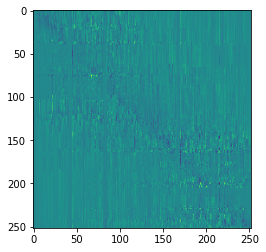

In [ ]:
plt.imshow(batch_out9['inputs_2d'][0,:,:,-9])

In [ ]:
batch_out['beta_positions'].shape

(1, 64, 3)

In [ ]:
batch_out['domain_name']

array([[b'T0976-l64_s64']], dtype=object)

In [ ]:
batch_out['chain_name']

array([[b'T0976']], dtype=object)

In [ ]:
batch_out['sequences']

array([[b'GIIESAIESAVPNKNQKMYFYCGGGFRSALVADKLREMGYKNVISVDGGWRAWNAKGYPTVSPN']],
      dtype=object)

In [ ]:
batch_out4['residue_index']

array([[[  0],
        [  1],
        [  2],
        [  3],
        [  4],
        [  5],
        [  6],
        [  7],
        [  8],
        [  9],
        [ 10],
        [ 11],
        [ 12],
        [ 13],
        [ 14],
        [ 15],
        [ 16],
        [ 17],
        [ 18],
        [ 19],
        [ 20],
        [ 21],
        [ 22],
        [ 23],
        [ 24],
        [ 25],
        [ 26],
        [ 27],
        [ 28],
        [ 29],
        [ 30],
        [ 31],
        [ 32],
        [ 33],
        [ 34],
        [ 35],
        [ 36],
        [ 37],
        [ 38],
        [ 39],
        [ 40],
        [ 41],
        [ 42],
        [ 43],
        [ 44],
        [ 45],
        [ 46],
        [ 47],
        [ 48],
        [ 49],
        [ 50],
        [ 51],
        [ 52],
        [ 53],
        [ 54],
        [ 55],
        [ 56],
        [ 57],
        [ 58],
        [ 59],
        [ 60],
        [ 61],
        [ 62],
        [ 63],
        [ 64],
        [ 65],
        [ 

In [ ]:

with tf.Session(config=tf.ConfigProto(
    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.9)
)) as sess:
    
    checkpoint.restore(sess, FLAGS.checkpoint_path)
    my_model.get_one_example(sess)
    my_model.get_one_example(sess)
    my_model.get_one_example(sess)
    batch_out_1 = my_model.get_one_example(sess)
    length = batch_out_1['sequence_lengths'][0]
    crop_size_x = my_model.crop_size_x
    crop_size_y = my_model.crop_size_y
    batch_size = batch_out_1['sequence_lengths'].shape[0]
    domain = batch_out_1['domain_name'][0][0].decode('utf-8')
    chain = batch_out_1['chain_name'][0][0].decode('utf-8')
    inputs_1d = batch_out_1['inputs_1d']
    output_fetches = {'probs': my_model.eval_probs}
    output_fetches['softmax_probs'] = my_model.eval_probs_softmax
    if 'residue_index' in batch_out_1:
        logging.info('Getting residue_index from features')
        residue_index = np.squeeze(
            batch_out_1['residue_index'], axis=2).astype(np.int32)
    else:
        logging.info('Generating residue_index')
        residue_index = np.tile(np.expand_dims(
            np.arange(length, dtype=np.int32), 0), [batch_size, 1])
        
        
    prob_weights = 1
    if config['eval_config']['pyramid_weights'] > 0:
        sx = np.expand_dims(np.linspace(1.0 / crop_size_x, 1, crop_size_x), 1)
        sy = np.expand_dims(np.linspace(1.0 / crop_size_y, 1, crop_size_y), 0)
        prob_weights = np.minimum(np.minimum(sx, np.flipud(sx)),
                                  np.minimum(sy, np.fliplr(sy)))
        prob_weights /= np.max(prob_weights)
        prob_weights = np.minimum(prob_weights, config['eval_config']['pyramid_weights'])
    
    

    patch1 = compute_one_patch(sess, my_model, output_fetches, inputs_1d, residue_index,
          prob_weights, batch_out_1, length, 0, 0, crop_size_x, crop_size_y)
    patch2 = compute_one_patch(sess, my_model, output_fetches, inputs_1d, residue_index,
          prob_weights, batch_out_1, length, 0, 64, crop_size_x, crop_size_y)
    patch3 = compute_one_patch(sess, my_model, output_fetches, inputs_1d, residue_index,
          prob_weights, batch_out_1, length, 0, 128, crop_size_x, crop_size_y)
    
    patch4 = compute_one_patch(sess, my_model, output_fetches, inputs_1d, residue_index,
          prob_weights, batch_out_1, length, 64, 0, crop_size_x, crop_size_y)
    patch5 = compute_one_patch(sess, my_model, output_fetches, inputs_1d, residue_index,
          prob_weights, batch_out_1, length, 64, 64, crop_size_x, crop_size_y)
    patch6 = compute_one_patch(sess, my_model, output_fetches, inputs_1d, residue_index,
          prob_weights, batch_out_1, length, 64, 128, crop_size_x, crop_size_y)
    
    patch7 = compute_one_patch(sess, my_model, output_fetches, inputs_1d, residue_index,
          prob_weights, batch_out_1, length, 128, 0, crop_size_x, crop_size_y)
    patch8 = compute_one_patch(sess, my_model, output_fetches, inputs_1d, residue_index,
          prob_weights, batch_out_1, length, 128, 64, crop_size_x, crop_size_y)
    patch9 = compute_one_patch(sess, my_model, output_fetches, inputs_1d, residue_index,
          prob_weights, batch_out_1, length, 128, 128, crop_size_x, crop_size_y)
    
    hidden_2d_ = my_model._concatenate_2d(hidden_1d, residue_index, hidden_2d, crop_x, crop_y,
        my_model._binary_code_bits, crop_size_x, crop_size_y)
    
#     output1 = compute_one_prediction(0, my_model, sess, 64, 32, batch_out_1)
#     batch_out_2 = my_model.get_one_example(sess)
#     batch_out_3 = my_model.get_one_example(sess)
#     batch_out_4 = my_model.get_one_example(sess)
#     batch_out_5 = my_model.get_one_example(sess)
#     batch_out_6 = my_model.get_one_example(sess)
#     batch_out_7 = my_model.get_one_example(sess)
#     batch_out_8 = my_model.get_one_example(sess)
#     batch_out_9 = my_model.get_one_example(sess)
#     batch_out_10 = my_model.get_one_example(sess)

INFO:tensorflow:Restoring parameters from ./deepmind-research/alphafold_casp13/873731/0/tf_graph_data/tf_graph_data.ckpt


INFO:tensorflow:Restoring parameters from ./deepmind-research/alphafold_casp13/873731/0/tf_graph_data/tf_graph_data.ckpt


In [ ]:
config['eval_config']['pyramid_weights']

0.75

In [ ]:
patch1.keys()

dict_keys(['prob', 'weight', 'softmax'])

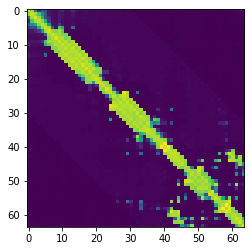

In [ ]:
plt.imshow(patch1['prob'])